# Thinking with Deep Learning

This notebook will accompany the Thinking with Deep Learning workshop.


## Introduction: Thinking with Deep Learning


# Deep Learning? Training and Taming Deep Networks



# The Expanding Universe of Deep Models

Follow along on the slides!

#	The Datome - Finding, Wrangling and Encoding Everything as Data

Follow along on the slides!


# PRACTICE: Experimenting with Model Components and Data

In practice, deep learning pipelines are often best setup with python, with the most popular underlying packages and computation systems being keras and pytorch. These packages offer a fair amount of flexibility, and many other popular domain specific packages (such as HuggingFace, notable for their wonderful suite of large language models!) are built on top of Keras or PyTorch. It is ideal to have some kind of handle on how Keras and PyTorch work, because odds are if you are using some deep learning in your analysis, if not directly built using these tools, it uses them as part of its underlying computation in one or other.  

## Why Keras AND PyTorch

**Keras** is a high-level package and enables rapid plug & play. It elegantly represents the building blocks of a neural network, so we will lead with it in this section. Developed by an ex-Google engineer, its emphasis is its ability to rapidly prototype neural networks while also being integrated into the second-generation Tensorflow ecosystem (described below). Unlike other packages which might have their own computational engine, Keras runs on top of others, such as Tensorflow, Theano or MXNet. While it shines in its ability deep learning newbies to start right away, it loses points for lack of low-level flexibility.

**PyTorch** offers a lower-level approach with more flexibility, surfacing more controls for the mature user. Because we focus on the representations learned during training, we prefer PyTorch because it gives us customized control over these representations… but for a simple classification task, keras can often do the trick. We will include PyTorch examples of the same network, side-by-side, to introduce its syntax. Developed by Facebook AI, PyTorch has quickly become one of the most used and supported deep learning packages, particularly by the deep learning research community for its ease of debugging and ability to easily conjure up complex models. Deep learning frameworks require a “computational engine” to function, specifically to train deep learning models. PyTorch does this with a dynamic computational graph that uses a “define-by-run” logic, which connects all parts of a neural model in terms of the data objects passed and computations done on them. You’ll see examples of this throughout.


## Beyond Keras and Pytorch?

As mentioned before, while Keras and PyTorch are the fundamental deep learning packages, it is very possible - maybe even likely - that you write full pipelines of code using deep learning where you don't directly use these packages. For example, embeddings are often used in social science reserch, and many packages offering embeddings out of the box don't require you to interact with keras or pytorch.

However, it does pay off to know how to build basic neural networks with these two ecosystems, in the case you would need to get your hands dirty. The first part of this tutorial will have you build such a basic network for an image classification task - even if you may not directly be classifying images in your own social scientific projects, it is a classic setup and is worth well being familiar with - and indeed, paradigms such as classification are the root of more complex deep learning based approaches.

### Imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [1]:
import sklearn.datasets
import sklearn.model_selection
import numpy as np

In [2]:
import matplotlib.pyplot as plt


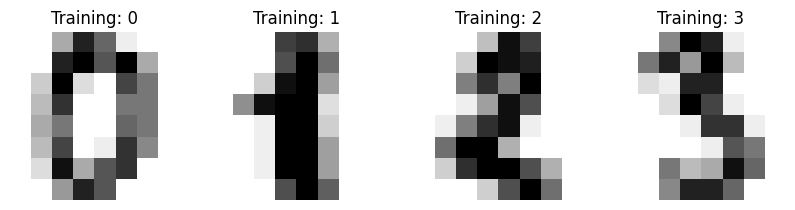

In [3]:
digits = sklearn.datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [6]:
import sklearn.linear_model

In [7]:
logreg = sklearn.linear_model.LogisticRegression()

In [8]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
logreg.predict(X_test)

array([8, 6, 4, 8, 0, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 5, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       9, 9, 1, 7, 6, 8, 4, 9, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [10]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.9299221357063404

Not terrible, but not exactly a good accuracy score. Let's now turn to neural networks with the hope that added depth can do a better job at approximating the complext function behind the data generation process. We will be using the same dataset.

### Single layer net in Keras

We will start with Keras for building a neural network. [Keras](https://keras.io/) is a very popular choice for building neural networks which have a high level of abstraction. Keras is also tightly integrated with another popular deep learning package, Tensorflow, which is the core of its computational process. One of the big advantages of Keras is how easy it is to start building a model.

In [11]:
## Keras
import keras
import tensorflow as tf
import numpy as np

In [12]:
from keras.layers import Dense

In [13]:
from keras.models import Sequential

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, which is often used for hidden layers.

In [14]:
model = Sequential()

In [15]:
model.add(Dense(200, input_dim=64, activation='relu'))

We then use a sigmoid activation for the last layer to make its prediction, because it is a classification problem.

For more activation functions: https://keras.io/api/layers/activations/

In [16]:
model.add(Dense(10, activation='softmax'))

The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser.

For more losses:https://keras.io/api/losses/

For more optimisers: https://keras.io/api/optimizers/

In [17]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

The compile function configures the model for training, and we fit the model in the next line. The history variable stores information about the training process.

In [18]:
len(X_train[0])

64

In [19]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 2s 4ms/step - loss: 2.1112 - sparse_categorical_accuracy: 0.4944
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.3046 - sparse_categorical_accuracy: 0.9131
Epoch 3/200
29/29 [==============================] - 0s 7ms/step - loss: 0.1475 - sparse_categorical_accuracy: 0.9555
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9777
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9911
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9777
Epoch 7/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9933
Epoch 8/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9967
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - l

In [20]:
preds = model.predict(X_test)

29/29 [==============================] - 1s 7ms/step


In [21]:
y_classes = preds.argmax(axis=-1)

In [22]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.9443826473859844

We see our model performs... just as well, or a little worse (depending on the random init!). Because we are not dealing with a massive dataset, logistic regression and a single layer neural network perform about just about the same. What should be noted here is how easily we could use Keras to build a single layer neural network.

### Single Layer Net in PyTorch

[PyTorch](https://pytorch.org/) is another widely used deep learning package, and one with high usage in both academia and industry. While Keras slotted in easily as an extension of the machine learning topics we saw yesterday (such as with its use of numpy, and the fit function), PyTorch runs on Tensors. Tensors are essentially a multi-dimensional matrix, and operate similarly to numpy arrays.

In the following lines of code, we will quickly look at some basic tensor operations, such as generating an empty tensor, basic operations on tensors, and converting between numpy arrays and tensors. While you will not be tested on your ability to manipulate tensors, it is useful to know how to play with them. The final line of code in this section converts our previously used numpy based data to tensors.

In [23]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

### Tensors and Data

In [24]:
#pytorch tensors calculation
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 1.8788e+31],
        [1.7220e+22, 2.1715e-18, 3.2872e+21],
        [1.0616e-08, 2.1589e-04, 5.3830e+22],
        [2.1395e+23, 1.6968e-07, 2.6824e+23],
        [2.1297e+23, 4.1298e-08, 2.3048e-12]])


torch.empty() allocates memory space for the array but does not initialize the values in this space--you get whatever uninitialized values are set to those cells in the memory!

In [25]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3512, 0.2722, 0.5905],
        [0.7588, 0.7363, 0.6424],
        [0.7088, 0.1211, 0.1939],
        [0.5206, 0.2556, 0.8741],
        [0.0654, 0.7547, 0.6120]])


torch.rand() produces random values [0,1]

In [26]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [27]:
y = torch.rand(5, 3)
print(x + y)

tensor([[3.3234e-01, 7.0812e-01, 4.7887e-01],
        [5.5204e-01, 5.9220e-01, 4.0579e-04],
        [2.8221e-01, 5.0116e-01, 2.2190e-03],
        [6.7458e-02, 9.4230e-01, 3.8243e-01],
        [5.3058e-01, 7.2071e-02, 8.8030e-01]])


In [28]:
print(torch.add(x, y))

tensor([[3.3234e-01, 7.0812e-01, 4.7887e-01],
        [5.5204e-01, 5.9220e-01, 4.0579e-04],
        [2.8221e-01, 5.0116e-01, 2.2190e-03],
        [6.7458e-02, 9.4230e-01, 3.8243e-01],
        [5.3058e-01, 7.2071e-02, 8.8030e-01]])


In [29]:
y.add_(x) # the `_` sign at end means the operation mutates tensor y in-place
print(y)

tensor([[3.3234e-01, 7.0812e-01, 4.7887e-01],
        [5.5204e-01, 5.9220e-01, 4.0579e-04],
        [2.8221e-01, 5.0116e-01, 2.2190e-03],
        [6.7458e-02, 9.4230e-01, 3.8243e-01],
        [5.3058e-01, 7.2071e-02, 8.8030e-01]])


In [30]:
# to_remove solution
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = torch.add(a1 @ a2, a3)
print("A =", A)

A = tensor([[20, 24],
        [31, 27]])


In [31]:
# @ and torch.matmul return a multidimensional tensor
b1 = torch.tensor([[3], [5], [7]])
b2 = torch.tensor([[2], [4], [8]])
b = b1.T @ b2
print("b =", b)

b = tensor([[82]])


In [32]:
# dot function returns a scalar tensor
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = torch.dot(b1, b2)
print("b =", b)

b = tensor(82)


We now look at converting between tensors and numpy arrays.

In [33]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [34]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [35]:
a.add_(1)
print(a)

tensor([2., 2., 2., 2., 2.])


In [36]:
print(b)

[2. 2. 2. 2. 2.]


In [37]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


We now get our training data ready.

In [38]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).type(torch.LongTensor)

### Constructing a Neural Network with PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

[Pytorch's nn module](https://pytorch.org/docs/stable/nn.html) is the basic unit for building neural networks (or computational graphs, as it is sometimes referred to in pytroch). For example, for a hidden layer, we use the Linear layer.

In [39]:
import torch.nn.functional as F

In [40]:
nn.Linear(20, 20)

Linear(in_features=20, out_features=20, bias=True)

The module also includes activation functions.

In [41]:
nn.ReLU()

ReLU()

We usually encapsulate the network by defining the hidden layers and activation functions we will be needing, which you can see in the initialisation. You can then see the forward passes the input tensor through each of the operations.

In [51]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(64, 200)
        # Output layer, 10 output for the classification
        self.output = nn.Linear(200, 10)
        # Define sigmoid activation and softmax output
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [52]:
net = Network()

We then define the optimiser and loss function.

In [53]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [54]:
criterion = F.nll_loss

Unlike Keras where we hit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [55]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()
    losses.append(loss.data.numpy())
    return losses

In [56]:
import matplotlib.pyplot as plt

In [57]:
X_train_tensor.float()

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  2.,  ..., 14.,  0.,  0.],
        [ 0.,  1., 12.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  3.,  0.,  0.]])

In [58]:
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)

Shape of X_train_tensor: torch.Size([898, 64])
Shape of y_train_tensor: torch.Size([898])


In [59]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


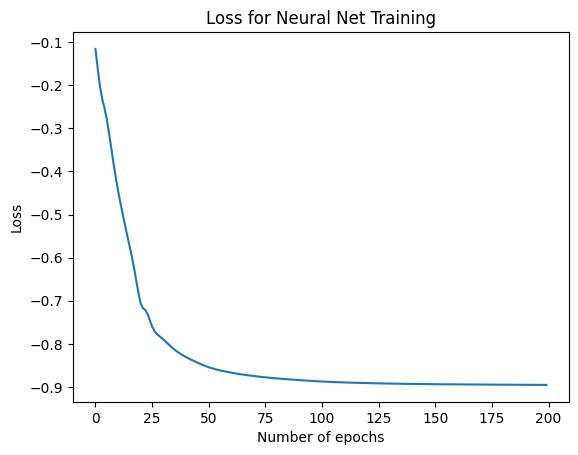

In [60]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [61]:
output = net(torch.tensor(X_test).float())

In [62]:
y_classes = output.argmax(axis=-1)

In [63]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.8476084538375973

Ok! So our PyTorch neural net did worse than both Keras and logistic regression. This is a demonstration of how neural networks which are similar in structure can still end up as divergently performing models because of random weights initialisation between different libraries.

Let us now make our networks deep, and see if that helps!

### Keras Deep Net

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does! In the last example, we added each layer line by line. Here, we use a single list.

For this simple neural network, we use a virtual example based on make_classification function of sklearn package.


In [65]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [66]:
model = keras.models.Sequential([keras.layers.Dense(200, input_dim=64, activation='relu'),
                                 keras.layers.Dense(200, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [67]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

In [68]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 4s 11ms/step - loss: 1.5285 - sparse_categorical_accuracy: 0.6136
Epoch 2/200
29/29 [==============================] - 0s 9ms/step - loss: 0.1640 - sparse_categorical_accuracy: 0.9521
Epoch 3/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9833
Epoch 4/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0414 - sparse_categorical_accuracy: 0.9911
Epoch 5/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0237 - sparse_categorical_accuracy: 1.0000
Epoch 6/200
29/29 [==============================] - 0s 12ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9967
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0114 - sparse_categorical_accuracy: 1.0000
Epoch 8/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0087 - sparse_categorical_accuracy: 1.0000
Epoch 9/200
29/29 [==============================] - 0s 9ms/step -

In [69]:
y_predict = np.argmax(model.predict(X_test), axis=1)
sklearn.metrics.accuracy_score(y_test, y_predict)

29/29 [==============================] - 0s 2ms/step


0.9488320355951056

So our deep(er) Keras model does better than the single layer Keras


These simple examples show you the plug and play nature of such approaches, and we encourage you to experiment with your own data.

Something to note here - that as the model learns how to distinguish between the numbers, it also learns different features of the images to make that prediction, which is reflected in the weights of the neural network. It is these weights that are often later used as "embeddings".

So far though, our neural networks performance might not have quite convinced you why we should even use them! So let's fix that by quickly setting up a convolutional neural network, which kicked off the deep learning revolution, with the same dataset.

## Simple MNIST convnet

**Original Author:** [fchollet](https://twitter.com/fchollet)<br>


### Setup

In [70]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

In [71]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Build the model

In [72]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### Train the model

In [73]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 51s 118ms/step - loss: 0.3705 - accuracy: 0.8883 - val_loss: 0.0805 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 48s 113ms/step - loss: 0.1124 - accuracy: 0.9661 - val_loss: 0.0566 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 63s 149ms/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0480 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 60s 142ms/step - loss: 0.0687 - accuracy: 0.9784 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 5/15
422/422 [==============================] - 45s 108ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 6/15
422/422 [==============================] - 47s 110ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0327 - val_ac

### Evaluate the trained model

In [74]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023347647860646248
Test accuracy: 0.9923999905586243


We see that having a neural network with the "right" architecure does much better at the task at hand.

#	Text Learning with Sequences & Attention


Follow along on the slides!

#	Language Learning with Large Language Models


Follow along on the slides!

#	PRACTICE: Building and Tuning Language Models

In this section we will explore how we can use out of the box language models for different text based tasks, as described in the slides and text above.

We will explore three different kinds of language models, from a shallow embedding (but widely popular!) word2vec, and two modern language models - the then transformative BERT model, and a super updated version - the GPT-4 knock off, alpaca/llama.

Note that that the alpaca and llama models use loads of RAM, which is we will not do extensive experimentation with them.

## Shallow Neural Embeddings

Word2vec, much like methods like LSA which we saw earlier, is based on theories of distributional semantics - words that appear around each other are more likely to mean similar things than words that do not appear around each other. Keeping this in mind, our job is to create a high dimensional space where these semantic relations are preserved. The innovation in word2vec is the realisation that we can use unlabelled, running text in sentences as inputs for a supervised learning algorithm--as a self-supervision task. It is supervised because we use the words in a sentence to serve as positive and negative examples. Let’s break this down:

... "use the kitchen knife to chop the vegetables"…

**C1   C2   C3   T   C4   C5   C6   C7**

Here, the target word is knife, and the context words are the ones in its immediate (6-word) window.
The first word2vec method we’ll see is called skipgram, where the task is to assign a probability for how likely it is that the context window appears around the target word. In the training process, positive examples are samples of words and their context words, and negative examples are created by sampling from pairs of words that do not appear nearby one another.

This method of implementing word2vec is called skipgram with negative sampling. So while the algorithm tries to better learn which context words are likely to appear around a target word, it ends up pushing the embedded representations for every word so that they are located optimally (e.g., with minimal semantic distortion). In this process of adjusting embedding values, the algorithm brings semantically similar words close together in the resulting high dimensional space, and dissimilar words far away.

Another word2vec training method, Continuous Bag of Words (CBOW), works in a similar fashion, and tries to predict the target word, given context. This is converse of skipgram, which tries to predict the context, given the target word. Skip-gram represents rare words and phrases well, often requiring more data for stable representations, while CBOW is several times faster to train than the skip-gram, but with slightly better accuracy for the frequent words in its prediction task. The popular gensim implementation of word2vec has both the methods included.

The code below has two examples, one for loading a pre-trained word2vec model, and one for training our own model, with an explanation of the hyperparameters.




#### Data

First, we being loading a sample corpus to play with. It is useful for us to demonstrate these examples with a dataset with text from a similar theme, but different topics, so that we have some differentiation. We will be using the hobbies dataset which comes pre-loaded with [YellowBrick](https://www.scikit-yb.org/en/latest/index.html), a python Machine Learning visualisation toolkit.

The hobbies corpus is a text corpus wrangled from the [Baleen RSS Corpus](https://github.com/DistrictDataLabs/baleen) to enable students and readers to practice different techniques in Natural Language Processing. It is structured as:

Overall:

- 7,420 paragraphs (16.562 mean paragraphs per file)

- 14,251 sentences (1.921 mean sentences per paragraph).

By Category:

- books: 72 docs, 844 paragraphs and 2,030 sentences

- cinema: 100 docs, 1,475 paragraphs and 3,047 sentences

- cooking: 30 docs, 1,190 paragraphs and 2,425 sentences

- gaming: 128 docs, 1,802 paragraphs and 3,373 sentences

- sports: 118 docs, 2,109 paragraphs and 3,376 sentences


In [75]:
from yellowbrick.datasets import load_hobbies

In [76]:
corpus = load_hobbies()

In [77]:
len(corpus.data)

448

In [78]:
corpus.data[0]

"Editor's note: This infographic was published before the 2016 NCAA tournament tipped off. And the opening Thursday brought two more 12-seed wins over a 5-seed with Yale knocking off Baylor and Arkansas-Little Rock taking down Purdue.\n\nThis season has been full of upsets, so bracket builders and pundits alike are expecting plenty in this tournament. But one first-round matchup is infamously perilous for the earlier seed every year: the dreaded 5-seed vs. 12-seed matchup. From 2008 to 2014, No. 12 seeds actually had a winning record, taking 15 of 28 matchups.\n\n\n\nSee how your tournament bracket is faring -- we'll track your hits (and misses) here!\n\nCheck my brackets\n\nThis year, four new 5-seeds are ripe for the picking. (According to FiveThirtyEight.com, Indiana has the highest win probability as a 5-seed, at 88 percent, and Baylor's is just 61 percent. No 4-seed has a lower-than-84 percent chance of winning its first-round matchup.) So before you submit your brackets, make sur

In [79]:
corpus.target[0]

'sports'

In [80]:
corpus.data[200]

'A\xa0Tyler Perry sizzle reeled just played followed by the multi-hyphenate stepping on stage. He regaled the crowd how the idea was cracked for his Oct. 21 screening,\xa0Boo! A Madea Halloween.\xa0“In Chris Rock’s movie Top Five,\xa0he jokes about a Madea Halloween movie selling out with a line down the block. So I got a call from Lionsgate executives who thought it was a good idea.” Perry then turned it over to Lionsgate’s motion picture co-chairs Rob Friedman and Patrick Wachsberger. Later on at the end of this session, they’re going to treat us in the room to\xa0Now You See Me 2,\xa0one of two films that played here this year at CinemaCon after\xa0Captain America: Civil War.\xa0\n\n\n\n“They have a lot of movies to share with you that I’m not in,” joked Perry, “That I wasn’t invited to be in”\n\nPerry is traveling the country on tour with his show, showing the trailer at the end to great response.\n\n\n\nEmma Roberts via video introduced her thriller\xa0Nerve\xa0co-starring Dave Fr

In [81]:
corpus.target[200]

'cinema'

In [82]:
from gensim.parsing.preprocessing import preprocess_documents

In [83]:
preprocessed_texts = preprocess_documents(corpus.data)

#### Training Word Embeddings

In the first example, we train a word2vec model on the hobbies dataset with a dimension size of 100 and window of 10, meaning the context window is 10 words. The training process goes through 10 iterations.



In [84]:
from gensim.models import Word2Vec


Here, pre-processed texts is a file we created for our topic models, and includes stemmed words. This is a useful exercise to see how pre-processing effects word2vec models. The deeper the model the less pre-processing we need to perform because the model can be trained to perform optimal processing.

NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size".

In [85]:
w2vmodel_cleaned = Word2Vec(
        preprocessed_texts,
        vector_size=100,
        window=10)

Let's test the model by looking up some words that we know are in the corpus and find similar words.

In [86]:
w2vmodel_cleaned.wv.most_similar("book")

[('stori', 0.9995144009590149),
 ('base', 0.9993875026702881),
 ('novel', 0.9993643760681152),
 ('titl', 0.9992986917495728),
 ('featur', 0.9992901682853699),
 ('follow', 0.9992808699607849),
 ('recent', 0.9992803335189819),
 ('publish', 0.9992794394493103),
 ('author', 0.9992674589157104),
 ('comic', 0.9992557168006897)]

In [87]:
w2vmodel_cleaned.wv.most_similar("talk")

[('continu', 0.9997799396514893),
 ('left', 0.9997666478157043),
 ('bring', 0.9997578859329224),
 ('experi', 0.9997552037239075),
 ('todai', 0.9997540712356567),
 ('futur', 0.999751091003418),
 ('line', 0.9997462034225464),
 ('awai', 0.9997457265853882),
 ('writer', 0.9997448325157166),
 ('face', 0.9997442364692688)]

NOTE: it may soon become clear in the next section, but it isn't the best idea to use a corpus with stop words removed. Following from above, we lose a lot of potential relationships we can learn automatically!

We don't always need to train our own models. One of the advantages of word embedding (and many deep learning) models is using pre-trained models, where the training has already been completed on a large and/or representative corpus or document collection.

In the following lines of code we will use the gensim pre-trained models!

In [88]:
import gensim.downloader as api

#### Download!

Note - downloading this can take 5-7 mins!

In [89]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [90]:
model.most_similar("book")

[('tome', 0.7485830783843994),
 ('books', 0.7379177808761597),
 ('memoir', 0.7302926778793335),
 ('paperback_edition', 0.6868364214897156),
 ('autobiography', 0.6741527318954468),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282975196838),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341459155082703),
 ('hardback', 0.6283079981803894)]

In [91]:
model.most_similar("booking")

[('Booking', 0.7250384092330933),
 ('bookings', 0.7056717872619629),
 ('booked', 0.6501323580741882),
 ('bookers', 0.604210376739502),
 ('bookable', 0.5701598525047302),
 ('ticketing', 0.546725869178772),
 ('ResEze', 0.5259395837783813),
 ('www.urbtix.hk', 0.5130801200866699),
 ('Airflights.co.uk', 0.5102490186691284),
 ('aerlingus.com', 0.5025158524513245)]

In [92]:
model.most_similar("talk")

[('talking', 0.713303804397583),
 ('talked', 0.6708846688270569),
 ('speak', 0.62212735414505),
 ('Talk', 0.5860583782196045),
 ('discuss', 0.5704180002212524),
 ('discussing', 0.522496223449707),
 ('tell', 0.5180698037147522),
 ('brag', 0.5099527835845947),
 ('complain', 0.5007246136665344),
 ('blab', 0.4967424273490906)]

Note how the most similar words make a lot more sense with the pre-trained, larger, ny times word2vec model. Also note what lemmatizing words can dramatically change the results of word2vec! Why? Because we are removing specificity in context that our model can otherwise learn. The smaller the corpus, the more useful to remove content (e.g., stem); the larger the corpus, the more useful to retain it.

Just so we have a comparison, we also create a non-cleaned corpus of the hobbies dataset on which to build an embedding model.

In [93]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation

In [94]:
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation]

In [95]:
tokenized_texts = []

In [96]:
for doc in corpus.data:
  tokenized_texts.append(preprocess_string(doc, CUSTOM_FILTERS))

In [97]:
tokenized_texts[0][0:10]

['editor',
 's',
 'note',
 'this',
 'infographic',
 'was',
 'published',
 'before',
 'the',
 '2016']

NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size"

In [98]:
w2vmodel = Word2Vec(tokenized_texts,
        vector_size=100,
        window=10)

#### Exploring Semantics with Embeddings

So what do these vectors encapsulate? We've seen before that it is some notion of meaning, as captured by distributional semantics, with some aspect of syntactic information. How do we then use these word embeddings? Because they capture semantic information in a space that allows for semantic decomposition, a common task is to perform semantic arithmetic and analogy tasks.


Find the word that least matches the others within a word set (cosine similarity).

In [99]:
# from keras.saving.legacy.model_config import model_from_yaml
model.doesnt_match(['books', 'books', 'novel', 'memoir', 'truck'])

'truck'

We can also perform arithmetic on vectors using the most_similar function we saw earlier. One of the more popular, earlier examples demonstrating the analogous power of word2vec models was vector['king'] - vector['man'] + vector['woman'] = vector['queen'], where the idea is that we are traversing a "gender" dimension and looking at either end of it.

Let's see how that works on our NY Times model.

In [100]:
model.most_similar(positive=['king', 'woman'], negative = ['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

If we shift ['king'] in the direction of woman, we get to ['royal']...and almost to ['queen'] (try adding woman twice!) Interestingly, ['prince'] is a similarly effeminate royal. We can begin to see the utility of these models, even if they do capture all semantic associations as we might imagine. Larger language models capture even more sophisticated relationships.

In the rest of this section we will see other ways in which we can use and explore word embeddings.

#### Visualising Word Embeddings

Most methods involving visualising word embeddings involve projecting words into a lower dimensional space and seeing which words appear nearby one another.

See this [example by TTIC](https://home.ttic.edu/~kgimpel/wordembviz/wordembviz.html) which visualises different sets of word embeddings, using t-SNE.

The code below gives you an idea of how you might do it yourself.

In [101]:
import matplotlib.pyplot as plt

In [102]:
numWords = 50

In [103]:
targetWords = model.index_to_key[350: 350 + numWords]
# targetWords = ["American", "Chinese", "Scottish", "Japanese", "English",
#                "hamburger", "cocktail", "dinner",
#                "energy", "wind", "water", "river", "windmill",
#                 "literature", "books", "author", "pages"]

In [104]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.06054688, -0.01293945, -0.10888672, ...,  0.08496094,
         0.16015625, -0.09130859],
       [ 0.04296875, -0.01306152,  0.0703125 , ...,  0.13378906,
         0.03222656, -0.15039062],
       [-0.08056641, -0.01281738,  0.14355469, ...,  0.04638672,
        -0.02685547, -0.16503906],
       ...,
       [ 0.02685547, -0.07617188,  0.02697754, ..., -0.01647949,
        -0.21972656,  0.07568359],
       [-0.00320435, -0.07080078,  0.08984375, ...,  0.08349609,
        -0.06152344, -0.14746094],
       [ 0.13476562, -0.08691406, -0.00946045, ..., -0.11523438,
        -0.06738281,  0.0703125 ]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words. We also recommend exploring UMAP, which allows projections to any arbitrary number of dimensions.

In [105]:
import sklearn.decomposition
import sklearn.manifold

In [106]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

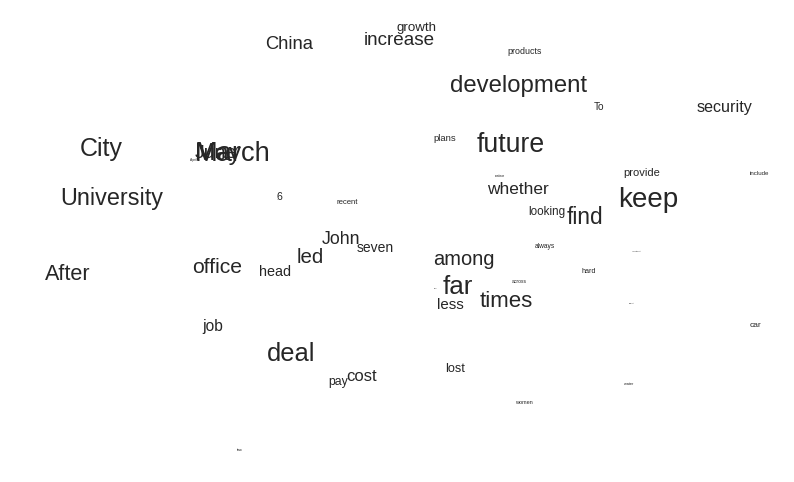

In [107]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Note how the TTIC projection was a lot more satisfactory because it projected related but differentiated words. Our example plots seemingly random words. We encourage that you try this example again with a curated list of words and see how the visualisation improves!

#### Projecting Embeddings on Dimensions of Social Analysis

We can see how word2vec does remarkably well in capturing certain aspects of semantics! Word embeddings have a lot of utility outside of just looking at relations between words, though. Because words derive their meanings from various social characteristics and dimensions, it is possible for us to project word vectors onto word-defined dimensions to see where they lie. We can create these dimensions by choosing words which that might anchor the dimension and then project other words onto this dimension. For example, if we were trying to find a gender dimension, we might make a vector between the words he, him, man and she, her, woman, and so on. Then, with a cosine projection, we can get a value of where our word of choice might lie on this dimension, revealing to us how “gendered” the word is. The following snippets of code implements this for various such dimensions. Using such a technique for social scientific analysis as described by Kozlowski et al 2019; it can be very easily extended for many business and analytical solutions.


First we can visualize with dimension reduction

In [108]:
import pandas

In [109]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [110]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

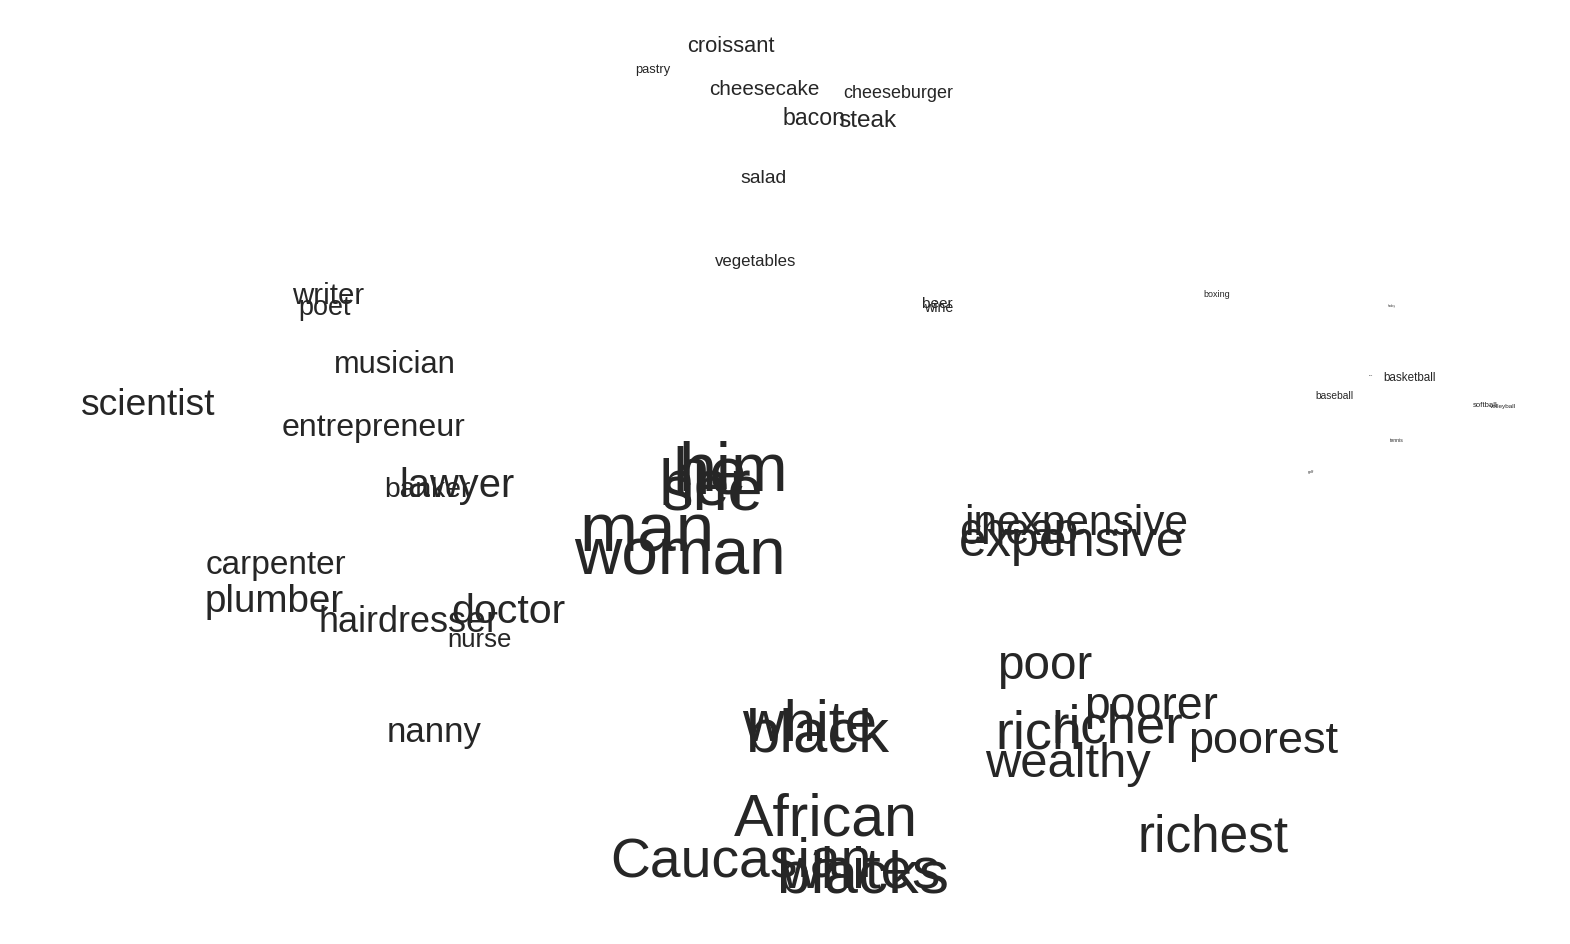

In [111]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0) #Making the points invisible

for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))

plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [112]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [113]:
Gender = dimension(model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [114]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [115]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [116]:
OCCdf = makeDF(model, Occupations)
Fooddf = makeDF(model, Foods)
Sportsdf = makeDF(model, Sports)

Define some useful functions for plotting.

In [117]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

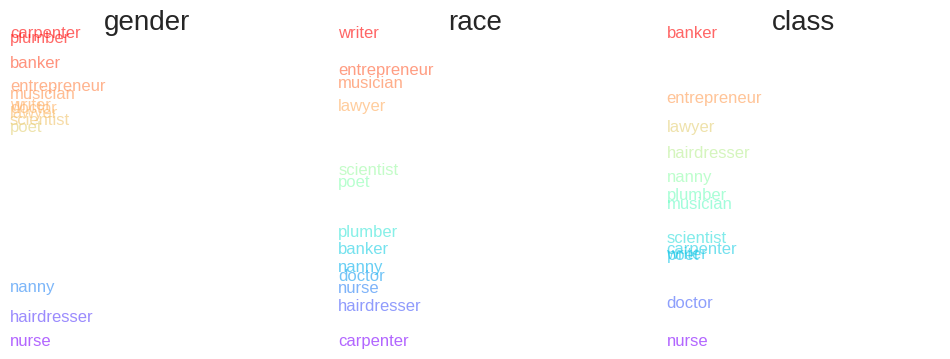

In [118]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

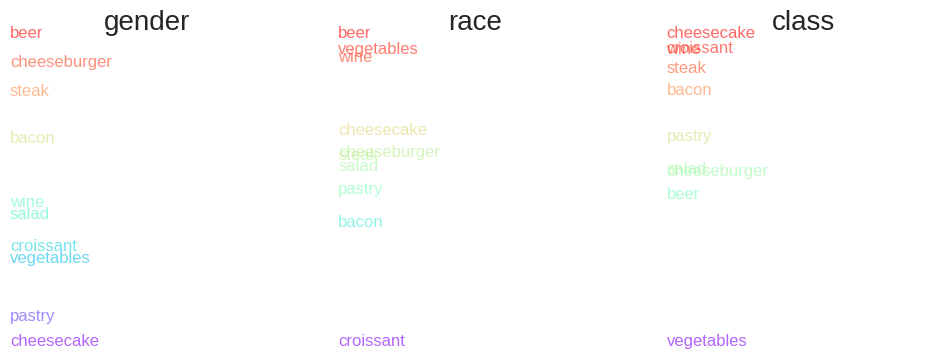

In [119]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

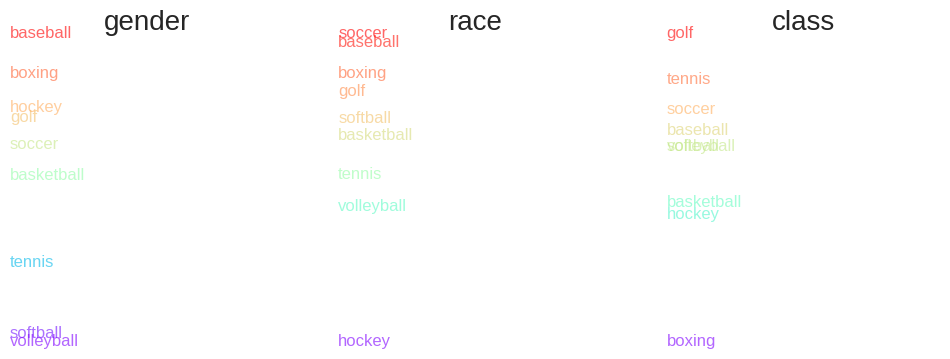

In [120]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## A game changer - Transformer Models

Attention based transformer models exploded onto the scene in 2016 and 2017, initially as a way to deal with machine translation - and soon took over and has become the standard for language modelling (but also images, and audio, and occasionally networks!).

Transformers are also the bedrock of todays LLMs. Early Transformers models such as BERT were very popular for a burst of time around 2018 - but recent LLM advancements have made them less so, BUT they do remain powerful for a specific situation - when bi-directionality and context matters, such as embeddings.

To illustrate this, let us go back to our

### Sentence Transformers

In [123]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
from yellowbrick.datasets import load_hobbies

In [125]:
# Load the hobbies dataset
corpus = load_hobbies()

In [126]:
# Initialize the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [127]:
# Embed the hobbies
embeddings = model.encode(corpus.data, convert_to_tensor=True)

In [128]:
# Function to find the closest hobby
def find_closest_hobby(query, embeddings, corpus, model):
    query_embedding = model.encode(query, convert_to_tensor=True)
    distances = util.pytorch_cos_sim(query_embedding, embeddings)[0]
    closest_idx = distances.argmax()
    return corpus.data[closest_idx]

# Function to cluster and visualize the hobbies
def visualize_clusters(embeddings, corpus):
    # Perform t-SNE to reduce dimensionality to 2D for visualization
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings.cpu().numpy())

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=len(set(corpus.target)), random_state=42)
    clusters = kmeans.fit_predict(embeddings.cpu().numpy())

    # Plot the clusters
    plt.figure(figsize=(10, 8))
    for i in range(len(set(corpus.target))):
        indices = np.where(clusters == i)
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=f'Cluster {i}')

    plt.legend()
    plt.title('Hobbies Clustering')
    plt.show()



In [129]:
query = "Playing soccer"
closest_hobby = find_closest_hobby(query, embeddings, corpus, model)
print(f"Closest hobby to '{query}': {closest_hobby}")

Closest hobby to 'Playing soccer': 


MARTIN BUREAU/Getty Images 


Racing 92 have suspended their prop forward Martin Castrogiovanni after pictures emerged of the rugby player partying in Las Vegas with Paris Saint-Germain footballer Zlatan Ibrahimovic.

According to the Daily Telegraph, Castrogiovanni told the club he could not feature in the team’s Champions Cup showdown with Leicester Tigers at the weekend due to the fact he had family matters to attend to in Argentina. 

But photos emerged on social media of him accompanied by Ibrahimovic and other PSG stars Marco Verratti, Javier Pastore and Salvatore Sirigu, who had been given some time off by manager Laurent Blanc having already secured the Ligue 1 title. Here’s a snap of the Italian alongside Ibrahimovic, per BBC Sport:



He was out with Zlatan in Vegas.Martin Castrogiovanni is suspended by his club. pic.twitter.com/TXqa8lR3ve

Racing 92 released a statement in which they confirmed the 34-year-old’s suspension and labelled it

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


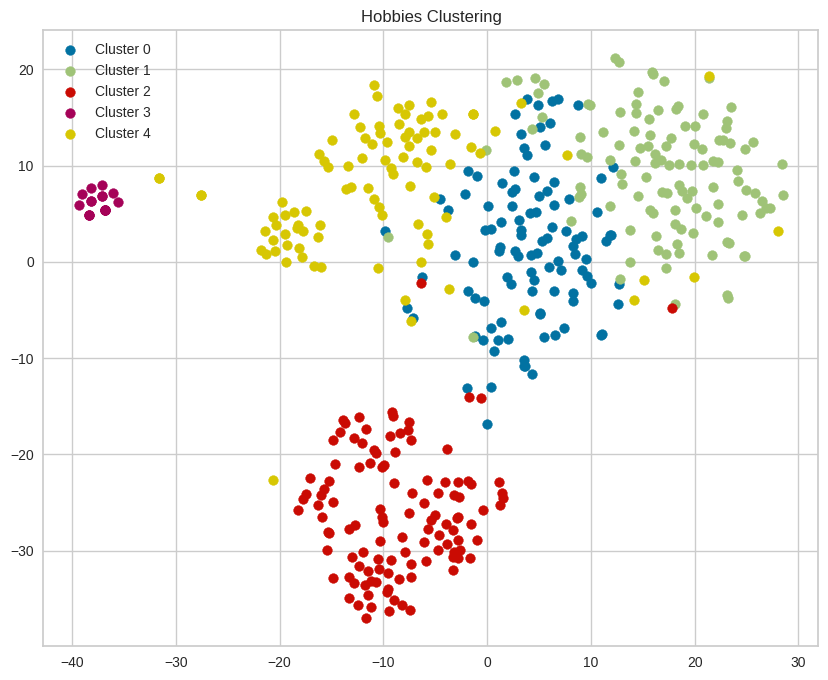

In [130]:
# Visualize the clusters
visualize_clusters(embeddings, corpus)

## LLMs and CSS





## Use Cases of LLMS

There are many different tasks for which one could apply LLMs according to the approaches we developed above. We showcase several below:

## - Actor - Critic - Improve Object with Critique

You can set up an "Actor-Critic" model by asking the model to generate text, and then ask it to generate a critique, and to regenerate the text according to the critique. In this way, you are instantiating two different models that seek to adversarially improve one another. Consider the following prompts in sequence:


CODE:
“Write story of up to 300 words in length intended for an native English language speaking child audience that involves two anthropomorphized puppies ‘Bumble’ and ‘Gruff’ who go on adventure.”


“Critique this story regarding its clarity, grammar, consistency, suspense, and surprise. Then rewrite in 300 words accounting for these critiques.”


“Critique this story regarding its clarity, grammar, consistency, suspense, and surprise. Then rewrite in 300 words accounting for these critiques.”

In [ ]:
!pip install openai==1.11.0

  Using cached openai-1.11.0-py3-none-any.whl (226 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.27.7
    Uninstalling openai-0.27.7:
      Successfully uninstalled openai-0.27.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tree-of-thoughts-llm 0.1.0 requires openai==0.27.7, but you have openai 1.11.0 which is incompatible.


In [ ]:
import getpass

OPENAI_API_KEY = getpass.getpass() #input: API KEY

··········


In [ ]:
import openai
from openai import OpenAI

openai.api_key = OPENAI_API_KEY

client = OpenAI(
    api_key=openai.api_key,
)

In [ ]:
stories = []

# generate story as an actor
prompt = "Write story of up to 300 words in length intended for an native English language speaking child audience that involves two anthropomorphized puppies ‘Bumble’ and ‘Gruff’ who go on adventure."
response = openai.chat.completions.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": prompt}])
story = response.choices[0].message.content.strip()
stories.append(story)

# run critique scenario twice
critique_prompt = "Critique this story regarding its clarity, grammar, consistency, suspense, and surprise. Then rewrite in 300 words accounting for these critiques: "
for i in range(1, 3):
    response = openai.chat.completions.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": critique_prompt + story}])
    story = response.choices[0].message.content.strip()
    stories.append(story)

Here, you can see that stories are improved through the process of actor-critique stages

In [ ]:
'Initial story:', stories[0]

('Initial story:',
 'Once upon a time, in a quaint little town called Pawsville, there lived two adorable puppies named Bumble and Gruff. Bumble was a fluffy golden retriever with big, floppy ears, while Gruff was a bouncy border collie with a mischievous twinkle in his eye.\n\nOne sunny morning, Bumble and Gruff decided to go on an adventure. They packed some snacks in a little backpack and set off into the nearby forest. As they trotted along, they came across a sparkling river that whispered secrets of hidden treasures.\n\nWithout thinking twice, Bumble and Gruff dove into the cool, clear water and swam to the other side. On the opposite bank, they found a magical clearing filled with colorful flowers and fluttering butterflies. They danced and played in the meadow, their laughter echoing throughout the forest.\n\nSuddenly, they heard a faint cry for help coming from behind a bush. Curious and brave, Bumble and Gruff rushed to investigate. To their surprise, they found a tiny kitten

In [ ]:
'Critique #1:', stories[1]

('Critique #1:',
 'The story is clear in its description of the characters and setting, but it lacks consistency in terms of the level of suspense and surprise. The buildup to the discovery of the kitten in distress is too sudden and lacks enough suspense to keep the reader engaged. Additionally, the resolution of the story is predictable and lacks a surprising twist to make it more memorable.\n\nRewritten story:\n\nIn the charming town of Pawsville, two playful puppies, Bumble and Gruff, resided. Bumble, a fluffy golden retriever, and Gruff, a bouncy border collie, were the best of friends. One sunny morning, they embarked on an exciting adventure into the nearby forest, carrying a little backpack filled with snacks.\n\nAs they strolled through the forest, they stumbled upon a glistening river that seemed to hold secrets of hidden treasures. Without hesitation, Bumble and Gruff leaped into the water and swam to the other side. Across the river, they discovered a magical clearing adorn

In [ ]:
'Critique #2:', stories[2]

('Critique #2:',
 "In the charming town of Pawsville lived two playful puppies, Bumble and Gruff. Bumble, a fluffy golden retriever, and Gruff, a bouncy border collie, were the best of friends. Together, they embarked on an exciting adventure one sunny morning, venturing into the nearby forest with a little backpack filled with snacks.\n\nAs they explored, they stumbled upon a glistening river that beckoned to them with hidden treasures. Without hesitation, the puppies plunged into the water, swimming to the other side where they discovered a magical clearing adorned with vibrant flowers and butterflies. Their laughter filled the meadow as they frolicked in the enchanting surroundings.\n\nSuddenly, a faint cry for help caught their attention from behind a bush. Curious, Bumble and Gruff rushed to the bush and found a tiny kitten trapped in thorns, meowing for assistance. With quick thinking and teamwork, Bumble carefully freed the kitten while Gruff gathered healing herbs to tend to it

## Rewriting texts in different ways (e.g German, Politically Sensitive)


“Rewrite the following text ‘This is the best hamburger I have ever tasted.’ in Russian and Chinese.


“Rewrite it as the sentiment might be rendered by a vegetarian”


“Rewrite it in two sentences with specific, concrete language about an eating experience.”


“Rewrite it in the style of Proust.”


“Rewrite it in the style of the following paper abstract: ‘Four score and seven years ago our fathers brought forth on this continent a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battlefield of that war. We have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But in a larger sense we cannot dedicate, we cannot consecrate, we cannot hallow this ground. The brave men, living and dead, who struggled here have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember, what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us,that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion, that we here highly resolve that these dead shall not have died in vain, that this nation, under God, shall have a new birth of freedom, and that government of the people, by the people, for the people, shall not perish from the earth.’”





In [ ]:
def generate_text_with_style(text, style):
    """
    This function takes a piece of text and uses OpenAI's GPT-4 to rewrite it in a specified style.

    Args:
    text (str): The original text.
    style (str): The desired style ('german_child' or 'conservative').
    api_key (str): Your OpenAI API key.

    Returns:
    str: The text rewritten in the specified style.
    """
    if style == 'german_child':
        prompt = f"Translate the following text into German as if it was written by a five-year-old child:\n\n{text}"
    elif style == 'conservative':
        prompt = f"Rewrite the following text in a politically conservative style:\n\n{text}"
    else:
        return "Invalid style specified."

    try:
        response = openai.chat.completions.create(
            model="gpt-4",  # Replace with "gpt-4" if you have access
            messages=[{'role': 'user', 'content': prompt}],
            temperature=0.7,
            max_tokens=250
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return str(e)

# Example usage
input_text = "This is an example text for style transformation."
style = 'german_child'  # Can be 'german_child' or 'conservative'
print(generate_text_with_style(input_text, style))


## Langchain

We will be using code from this tutorial to illustrate how LLMs can be used in action:

https://github.com/vminvsky/css-llm-tutorial.

## NOTE

You're going to have to upload the data and requirements to make sure that this sectoin works correctly.

In this section, we will see how LLMs can be used to annotate and generate data for studying linguistic constructs.

Our goals are as follows:

* **Goal 1:** Learn langchain.
    * Langchain is the most common library for interacting with LLMs in Python!

* **Goal 2:** Annotate a dataset with ChatGPT
    * Annotate texts as being sarcastic or not using ChatGPT.

* **Goal 3:** Generate Synthetic Data for a Specific Construct of Interest
    * Generate new examples of sarcastic and non-sarcastic texts.
    
A few requirements.
1. You will need an OpenAI key to generate the data. Because the data has already been generated, you won't need it to explore the synthetic data, but if you want to re-run the generation you will need to obtain a key. You can signup [here](https://openai.com/blog/openai-api)
2. *(If you have an API key)* In the .env file in root add your API key.
3. Run the requirements.txt file to pip install all the necessary libraries.
4. Visit the GitHub link and grab all the data and requirements.

#### Local Setup

Let's install all the required libraries to go through this document.

requirements - NOTE - this code will only work with older versions of openai and langchain.

pandas

langchain==0.0.205

numpy==1.22.4

scipy==1.10.1

python-dotenv

openai==0.27.8

In [ ]:
# requirements = "requirements.txt"
# !pip install -r {requirements}

In [122]:
pip install langchain==0.0.205

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2


In [131]:
pip install python-dotenv

In [132]:
pip install openai==0.27.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.2 MB/s eta 0:00:00


In [133]:
import pandas as pd
import openai
import langchain
from dotenv import load_dotenv
import os
from tqdm import tqdm

from langchain import LLMChain
from langchain.chat_models import ChatOpenAI

from langchain.prompts import (
    ChatPromptTemplate,
    PromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

load_dotenv()  # take environment variables from .env.

False

Run this cell to load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [134]:
%load_ext autoreload
%autoreload 2

In [ ]:
seed = 42    # for reproducibility

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

### 1. Dataset Introduction

The dataset includes two columns: `text` and `labels`. Where `text` is a Tweet and `label` is either sarcastic or non-sarcastic.

In [136]:
df = pd.read_json("/content/sarcasm.json", orient="records")

In [138]:
def example_rows(df):
    print("Example of a sarcastic text")
    print(df[df["labels"]=="sarcastic"].iloc[0]["text"])
    print()
    print("Example of a non-sarcastic text")
    print(df[df["labels"]=="not-sarcastic"].iloc[0]["text"])

In [139]:
print("Number of rows: ",len(df))
print("Number of sarcastic comments: ",len(df[df["labels"]=="sarcastic"]))
print()
example_rows(df)

Number of rows:  500
Number of sarcastic comments:  135

Example of a sarcastic text
do people with clear skin feel accomplished?? superior??? comfortable in their own skin???? whats that like lmfao

Example of a non-sarcastic text
A message to all Muslims and Refugees: I'm sorry for how my country is treating you. You are only human. #RefugeesDetained #Trump #rt


### 2. Langchain
> [LangChain](https://python.langchain.com/docs/get_started/quickstart) is a framework for developing applications powered by language models.

We will use Langchain to *annotate* and *generate* sarcastic texts! Langchain is currently the most widely used Python library for interacting with these LLMs programatically. It opens up a lot of cool functionalities, but we will limit to a simple case: given a prompt, let's generate text!

To design prompts we need to add both a `system` prompt and a `message` prompt. In Langchain this corresponds `HumanMessagePromptTemplate` and `SytemMessagePromptTemplate`. To read more about prompt templates you can look at the Langchain documentation [here](https://python.langchain.com/docs/modules/model_io/prompts/prompt_templates/).

All the prompts are included in the `utils.py` file but we will add an example below.

The **system** message basically puts the model into a certain headspace through meta-instructions. E.g., "You are a helpful assistant!".

The **human message** instead includes the actual task explanation.

In this code, we ask the model to generate `{num_generations}` (for example 10) `{direction}` (for example sarcastic) comments.

The function will then return a list with the two messages which we will feed into Langchain's LLM. :)


```py
def sarcasm_simple_prompt(self) -> list:
    system_message = SystemMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=[],
            template="You are a model that generates sarcastic and non-sarcastic texts."
        )
    )
    human_message = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=["num_generations", "direction"],
            template="Generate {num_generations} {direction} texts. Ensure diversity in the generated texts."
        )
    )
    return [system_message, human_message]
```





### 2.1 Annotations
Let's annotate texts as being sarcastic or not, and reporting the performance!

First, let's try it on one text:
> do people with clear skin feel accomplished?? superior??? comfortable in their own skin???? whats that like lmfao

*Only run the code if you have an OpenAI key, otherwise just import the files with already generated data.*

In [140]:
def sarcasm_annotate_prompt() -> list:
    system_message = SystemMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=[],
            template="You are a model that annotates sarcastic and non-sarcastic texts."
        )
    )
    human_message = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=["text"],
            template="""Classify the following text as being sarcastic or non-sarcastic. Reply with 'Sarcastic' if it's sarcastic and 'Non-sarcastic' if it's non-sarcastic.
            Text: {text}
            """
        )
    )
    return [system_message, human_message]

In [141]:
example_text = "do people with clear skin feel accomplished?? superior??? comfortable in their own skin???? whats that like lmfao"

In [ ]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.9)
prompt = ChatPromptTemplate.from_messages(sarcasm_annotate_prompt())
chain = LLMChain(prompt=prompt, llm=llm)
generated = chain.run({"text": example_text})

In [ ]:
print(generated)

Sarcastic


Great! It seems to work. Now we will iterate through all the sarcastic texts in our document.

In [ ]:
generated = []
for i, row in df.iterrows():
    text = row["text"]
    prompt = ChatPromptTemplate.from_messages(sarcasm_annotate_prompt())
    chain = LLMChain(prompt=prompt, llm=llm)
    generated.append(chain.run({"text": example_text}))

df["predict"] = generated

The annotations have already been run, so let's just import the dataset.

In [142]:
df = pd.read_json("/content/annotate_gpt-3.5-turbo.json")

In [143]:
def process_text(x):
    """
    Process GPT outputs. Otherwise
    """
    if "non-sarcastic" in x.lower():
        return "not-sarcastic"
    else:
        return "sarcastic"

df["predict"] = df["predict"].apply(lambda x: process_text(x))


Let's import some metrics to see how well the predictions are.

In [144]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy = accuracy_score(df["target"], df["predict"])
precision, recall, f1, _ = precision_recall_fscore_support(df["target"], df["predict"], average="macro")

print(f"Accuracy: {accuracy}")
print(f"F1 score: {round(f1, 3)}")

Accuracy: 0.602
F1 score: 0.596


Not amazing!

Instead, we can try to generate more data.

### 2.2 Generating data
Now we'll quickly go over how to generate more sarcastic texts. This can be used for *de-novo* dataset creation or for data augmentation.

We'll use a grounded prompting technique, where we'll rewrite real tweets to make them sarcastic or not!

Let's rewrite this Tweet as an example:
> Tapping a tuning fork and seeing who resonates

In [145]:
def sarcasm_grounded_prompt() -> list:
    system_message = SystemMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=[],
            template="You are a model that generates sarcastic and non-sarcastic texts."
        )
    )
    human_message = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            input_variables=["text", "num_generations", "direction"],
            template="""Rewrite the following text {num_generations} times to make it {direction}.
            Make as few changes as possible to the text and stay true to its underlying style.
            Text: {text}
            """
        )
    )
    return [system_message, human_message]

In [ ]:
example_text = "Tapping a tuning fork and seeing who resonates"

In [ ]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.9, max_tokens=512)
prompt = ChatPromptTemplate.from_messages(sarcasm_grounded_prompt())
chain = LLMChain(prompt=prompt, llm=llm)
generated = chain.run({"text": example_text, "direction": "sarcastic", "num_generations": 1})

In [ ]:
print(generated)

'Oh yeah, because tapping a tuning fork and seeing who resonates is clearly the pinnacle of intellectual pursuits. '


A little on the nose...GPT4 is better (sarcasm is hard)!

Don't run the following code if OpenAI key not connected, just import csv!

In [ ]:
generated = []
for i, row in df.iterrows():
    for direction in ["sarcastic", "not-sarcastic"]:
        text = row["text"]
        prompt = ChatPromptTemplate.from_messages(sarcasm_grounded_prompt())
        chain = LLMChain(prompt=prompt, llm=llm)
        generated.append(chain.run({"text": example_text, "direction": direction}))

df["augmented_text"] = generated

In [147]:
df = pd.read_json("/content/grounded_gpt-3.5-turbo.json")

### Analysis

Let's see, if there are any ideosyncracies in the generated sarcastic texts!

There is a lot that can be done here, but we will look at the prevelance of "Oh" in sarcastic comments between the two groups.

In [148]:
generated_sarcastic = df[df["labels"]=="sarcastic"]["augmented_text"].values
original_sarcastic = df[df["target"]=="sarcastic"].drop_duplicates(subset="text")["text"].values

In [149]:
oh_synthetic = len([k for k in generated_sarcastic if "oh" in k.lower()]) / len(generated_sarcastic)
oh_real = len([k for k in original_sarcastic if "oh" in k.lower()]) / len(original_sarcastic)

print(f"'Oh' present in {round(oh_synthetic, 3)} of synthetic texts")
print()
print(f"'Oh' present in {round(oh_real, 3)} of real texts")

'Oh' present in 0.165 of synthetic texts

'Oh' present in 0.022 of real texts


In [150]:
generated_sarcastic

array(['Oh, poor little Muslims and Refugees, did my country hurt your delicate feelings? #SarcasmForDays #NotSorry #TrumpTrain',
       'To all Muslims and Refugees: My apologies for not being able to treat you like the royalty you clearly are. #sarcasm #notsorry #MAGA',
       'It must be so hard being Muslim or a Refugee these days - NOT! Get over yourselves. #sarcasm #truthhurts #MakeAmericaGreatAgain',
       ...,
       'Almost forgot to let everyone know how obsessed I am with Jason Bateman today...the horror! ',
       "Can't go a day without reminding people that Jason Bateman exists and is relevant in my life 24/7.",
       'How could I forget to tweet about the most mind-blowing news of the day: my thoughts on Jason Bateman? My apologizes to anyone who had to suffer through that drama-filled moment of uncertainty.'],
      dtype=object)

## State of the art today - Alpaca!

[NOTE - requires high RAM - might not run!]

The state of the art today (July 2024!) in language related tasks is  GPT-4, released by Open AI - however, it's behind doors only API access makes it not the most interesting to use, and open source models such as LLaMa and Alpaca reach similar levels of performance without being a complete black box.

The code below uses such a model to generate text.



The following cells contains minimal code for running [Alpaca-LoRA](https://github.com/tloen/alpaca-lora/) for demonstration purposes. Please check the repo for more details.

In [ ]:
!pip install bitsandbytes
!pip install -q datasets loralib sentencepiece
!pip install -q git+https://github.com/zphang/transformers@c3dc391
!pip install -q git+https://github.com/huggingface/peft.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from peft import PeftModel
from transformers import LLaMATokenizer, LLaMAForCausalLM, GenerationConfig

tokenizer = LLaMATokenizer.from_pretrained("decapoda-research/llama-7b-hf")
model = LLaMAForCausalLM.from_pretrained(
    "decapoda-research/llama-7b-hf",
    load_in_8bit=True,
    device_map="auto",
)
model = PeftModel.from_pretrained(model, "tloen/alpaca-lora-7b")


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.9/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/gpu-t4-s-1l2qksn3z7mq1 --tunnel_background_save_delay=10s --tunnel_periodic_background_save_frequency=30m0s --enable_output_coalescing=true --output_coalescing_required=true'), PosixPath('--listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=h

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
def generate_prompt(instruction, input=None):
    if input:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""

In [ ]:
generation_config = GenerationConfig(
    temperature=0.1,
    top_p=0.75,
    num_beams=4,
)

def evaluate(instruction, input=None):
    prompt = generate_prompt(instruction, input)
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"].cuda()
    generation_output = model.generate(
        input_ids=input_ids,
        generation_config=generation_config,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=256
    )
    for s in generation_output.sequences:
        output = tokenizer.decode(s)
        print("Response:", output.split("### Response:")[1].strip())

In [ ]:
evaluate(input("Instruction: "))

Instruction: Tell me about alpacas.
Response: Alpacas are a species of camelid native to South America. They are known for their soft, luxurious fleece, which is used to make clothing and other products. Alpacas are also raised for their meat and milk. They are generally docile and gentle, and are often kept as pets.


#	Network Learning

Follow along on the slides!

#	Image Learning

Follow along on the slides!

#	Audio-Visual Learning

Follow along on the slides!

#        PRACTICE: Embedding different modalities


In this section we will have a quick look at embedding techniques for networks/graphs, images, and audio.




## Network Data

This section walks us through dealing with different kinds of network data and how to create representations of them which we can later use for ML and DL algorithms. We will also walk through some basic analyses we can do on networks and network-derived statistics we can pass to different models.

**IMPORTANT**

Here are some resources for graph and network data:
- Open Graph Benchmark - https://github.com/snap-stanford/ogb
- SNAP - http://snap.stanford.edu/data/index.html

You can also find many social networks and graph datasets on popular graph based packages such as karateclub, StellarGraph, and PyTorch_geometric.

In [151]:
import numpy as np
import networkx as nx

We mentioned that graphs are a way to represent connections between entities. From a mathematical perspective, this can be a set, one with information of the entities and the other with information on the edges (connections). It can also be a matrix or table, where each node is both a row and column, and a cell at the intersection of row and column indicates a connection between the two entities. Both of these naturally translate into a computational perspective. Let's try it out.

In [152]:
G = nx.Graph()

So now we have an empty graph object. In networkx we can add nodes and edges easily, and also convert this into a numpy matrix representation.

In [153]:
# adding one at a time
G.add_node(1)

In [154]:
# adding a list
G.add_nodes_from([2, 4])

In [155]:
G.nodes()

NodeView((1, 2, 4))

In [156]:
# we can add edges / connection
G.add_edge(1, 2)

In [157]:
# list of edges
G.add_edges_from([(1, 4), (2, 4)])

In [158]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 4)])

In [159]:
G[1][2]['weight'] = 2

In [160]:
nx.to_numpy_array(G)

array([[0., 2., 1.],
       [2., 0., 1.],
       [1., 1., 0.]])

So we see how each of the nodes here are one per row and column, and the values in the matrix represent the weights. Networkx also lets us draw the matrix.

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

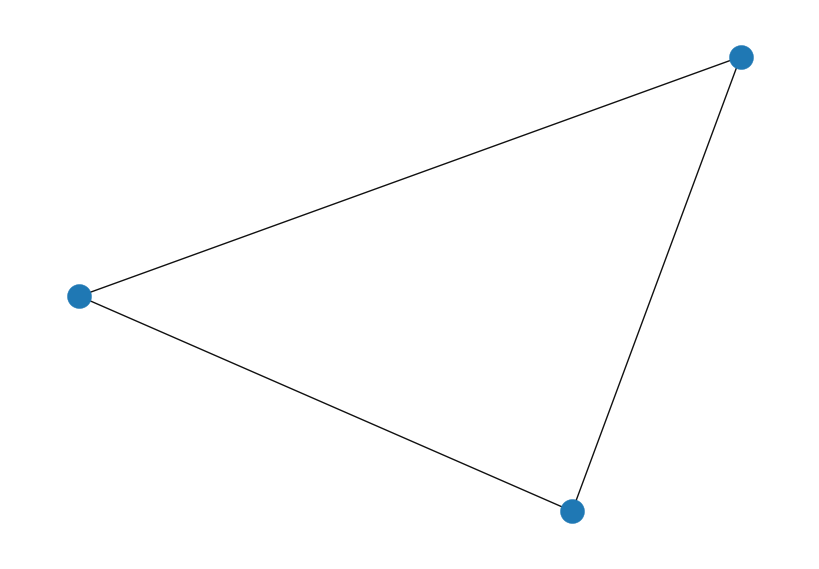

In [162]:
nx.draw(G)

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats.
Another way to play with graphs is generate graphs from random processes, or load graphs previously created by others. Let's check both out!

In [163]:
random_graph = nx.fast_gnp_random_graph(n=15, p=0.5)

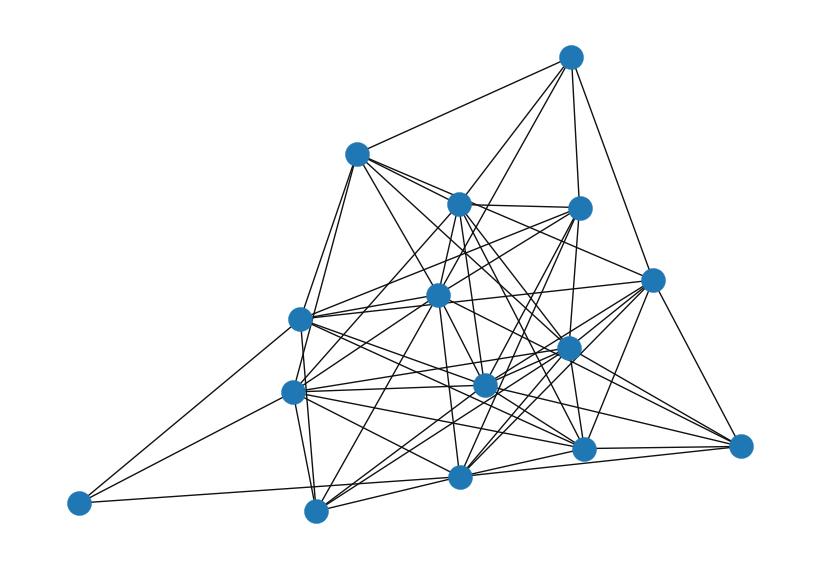

In [164]:
nx.draw(random_graph)

There are also popular, small networks created through different methods of data collection - in this case, an anthropological study.

Zachary W. (1977). "An information flow model for conflict and fission in small groups". Journal of Anthropological Research, 33, 452-473.

In [5]:
karate_club_graph = nx.karate_club_graph()

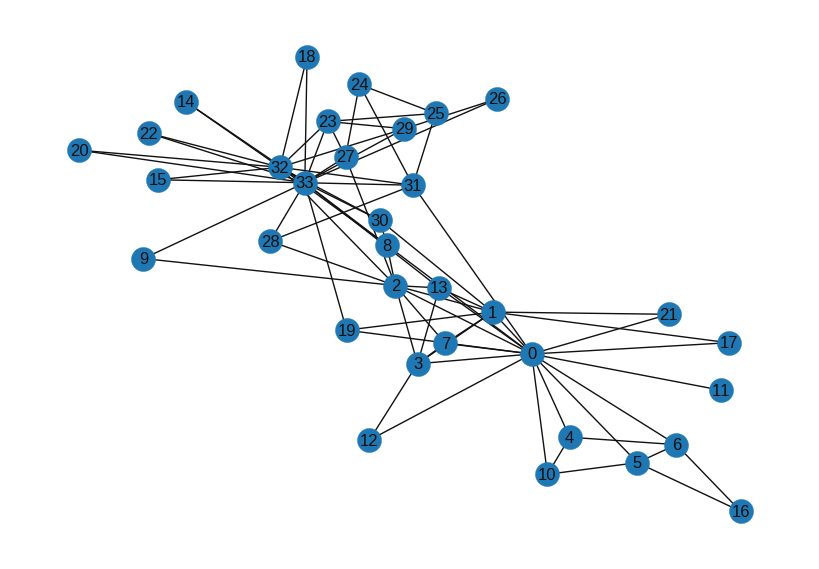

In [166]:
nx.draw(karate_club_graph, with_labels=True)

In [167]:
nx.to_numpy_array(karate_club_graph)

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

Common network-related tasks include link prediction, node classification, and the simulation of diffusions (e.g., of a disease or cultural norm) across the network. For these kinds of tasks, certain network features are useful. Networkx has a full suite of network related algorithms: https://networkx.org/documentation/stable/reference/algorithms/index.html

Let's see one such example with degree centrality--a measure of how central different nodes are as a function of the number of edges associated with it.

In [168]:
nx.degree_centrality(karate_club_graph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Network science is a vast field deeply linked (pun intended) with data science. While we'll look at deep learning for graphs and tables in more detail on the dedicated chapter to it, let's whip up a few basic graph-based embeddings to see what they reveal!



In [169]:
from networkx.algorithms import community

In [170]:
communities_generator = community.girvan_newman(karate_club_graph)

In [171]:
node_groups = tuple(sorted(c) for c in next(communities_generator))

In [172]:
node_groups

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [173]:
# plot the communities
color_map = []
for node in karate_club_graph:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')

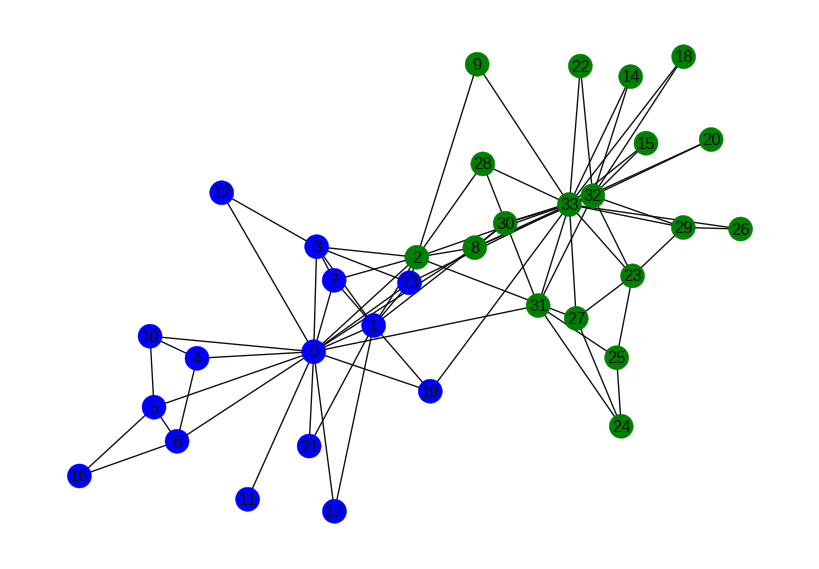

In [174]:
nx.draw(karate_club_graph, node_color=color_map, with_labels=True)

We can see that the girvan newman method does a good job with the karate club network!

### Graph Based Shallow Embeddings


#### node2vec

[node2vec](https://arxiv.org/abs/1607.00653) (Grover and Lescovec, 2016) is one such popular embedding. Intuition: Find embedding of nodes to dimensions so that “similar” nodes in the graph are close together.

In [1]:
!pip install node2vec

In [6]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from node2vec import Node2Vec

In [7]:
karate_club_graph = nx.karate_club_graph()

In [8]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [9]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [10]:
model.wv.get_vector('0')

array([ 0.0261871 , -0.02359569, -0.02165168,  0.09070194,  0.05512959,
        0.06139675, -0.01995024,  0.07712638, -0.075512  , -0.13999796,
        0.11299359, -0.11712066,  0.20145436,  0.06462186, -0.04796065,
       -0.17253882, -0.16884935,  0.06003945, -0.01538607,  0.17892843,
       -0.00719723,  0.12762123,  0.21736093,  0.16538708, -0.1733468 ,
        0.20411982, -0.136115  , -0.07505675, -0.02590963,  0.02171361,
       -0.00741487,  0.00437911, -0.19817449, -0.16696827,  0.08713885,
        0.04928254, -0.05944581,  0.06051881,  0.38009486,  0.28669497,
        0.22540848, -0.25970867,  0.10407459, -0.02728171, -0.17972353,
       -0.1302485 ,  0.06629816, -0.18681951, -0.02837535,  0.00428422,
        0.08899206,  0.12385803,  0.21743785,  0.11920257,  0.02049531,
        0.24456353,  0.30946562, -0.19536859,  0.1866171 , -0.19224949,
        0.18797775, -0.05576983, -0.162606  ,  0.15190303], dtype=float32)

In [11]:
model.wv.most_similar('0')

[('21', 0.8152523636817932),
 ('17', 0.7865344882011414),
 ('10', 0.7746471762657166),
 ('1', 0.7599300742149353),
 ('19', 0.7470075488090515),
 ('4', 0.7458765506744385),
 ('11', 0.7326381802558899),
 ('5', 0.7311329245567322),
 ('6', 0.7169106602668762),
 ('7', 0.7019205093383789)]

In [12]:
model.wv.most_similar('33')

[('32', 0.803041934967041),
 ('15', 0.8021883368492126),
 ('18', 0.7793106436729431),
 ('22', 0.7788832187652588),
 ('14', 0.7616671919822693),
 ('20', 0.7592209577560425),
 ('23', 0.7278737425804138),
 ('29', 0.6817749738693237),
 ('30', 0.6747637391090393),
 ('8', 0.6636168360710144)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured?

The node2vec package also includes edge embeddings, via the Hadamard (the best performing approach).

In [13]:
from node2vec.edges import HadamardEmbedder

In [14]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [15]:
edges_embs[('24', '25')]

array([ 0.00057727,  0.00487083,  0.0617499 ,  0.03314879,  0.00990061,
        0.01376015,  0.00422205,  0.14162563, -0.00382455, -0.00083781,
       -0.00583035,  0.01131471,  0.01689703, -0.00046881,  0.05148778,
        0.00786274,  0.00297295, -0.00429606,  0.01447714,  0.01813947,
        0.04042408,  0.00093521,  0.1280146 ,  0.05587713, -0.013897  ,
        0.14144947,  0.02927015,  0.00416325,  0.03518498,  0.08363942,
        0.00164206, -0.00275252,  0.12569743,  0.00534947,  0.03560326,
        0.02980348,  0.03449976,  0.04341829,  0.05709032,  0.04627719,
        0.04930256,  0.04177555, -0.00094931, -0.00324956,  0.00696079,
        0.00141512,  0.0162735 ,  0.00962291,  0.08070587,  0.0027232 ,
       -0.00173192, -0.0002215 , -0.00131581,  0.19884956,  0.0522624 ,
        0.00034823, -0.00395512,  0.00086593,  0.03228415,  0.01330643,
       -0.00424102,  0.01581093,  0.00348999,  0.00270469], dtype=float32)

In [16]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 28394.06it/s]


In [17]:
edges_kv.most_similar(str(('24', '25')))

[("('23', '25')", 0.9460493922233582),
 ("('24', '24')", 0.9396567940711975),
 ("('25', '25')", 0.9376397728919983),
 ("('24', '31')", 0.9245479106903076),
 ("('25', '27')", 0.9195384383201599),
 ("('24', '27')", 0.9193717241287231),
 ("('25', '31')", 0.9147912263870239),
 ("('23', '24')", 0.9027506709098816),
 ("('23', '27')", 0.8817010521888733),
 ("('23', '31')", 0.8688917756080627)]

These node and edge embeddings can be used for a wide range of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea of the different graph representations out there!

#### DeepWalk

Deepwalk is another popular shallow embedding method which uses random walks on a graph combined with word2vec to create embeddings. It was first described in [DeepWalk: Online Learning of Social Representations](https://arxiv.org/pdf/1403.6652.pdf). The GitHub repository with the code is: https://github.com/phanein/deepwalk, where you can run the code via command line.

In the cells below, we adapt the code from this GitHub repository (https://github.com/prateekjoshi565/DeepWalk) which creates it from scratch. You can also download the data in the repository, which is Wikipedia data.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [18]:
df = pd.read_csv("/content/seealsology-data.tsv", sep = "\t")

In [19]:
df.head()

,source,target,depth
0,space research,advances in space research,1
1,space research,benefits of space exploration,1
2,space research,committee on space research,1
3,space research,deep space exploration,1
4,space research,lists of space programs,1


In [20]:
df.shape

(784, 3)

In [21]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [22]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

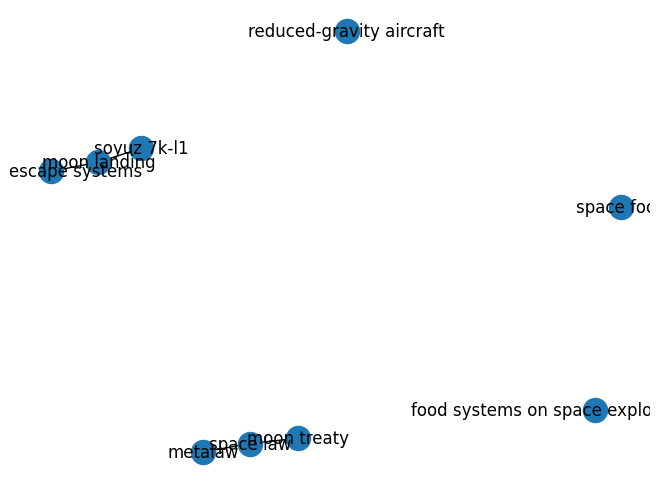

In [23]:
nx.draw(G.subgraph(terms), with_labels = True)

In [24]:
len(G) # number of nodes

556

In [25]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):

    random_walk = [node]

    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node

    return random_walk

In [26]:
get_randomwalk('space exploration', 10)

['space exploration',
 'russian space dogs',
 'animals in space',
 'parachuting animals']

In [27]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 556/556 [00:00<00:00, 3663.02it/s]


In [28]:
# count of sequences
len(random_walks)

2780

In [29]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [30]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [31]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(185215, 242200)

In [32]:
print(model)

Word2Vec<vocab=556, vector_size=100, alpha=0.03>


In [33]:
# find top n similar nodes
model.wv.most_similar('lunar escape systems')

[('robert goddard', 0.9945933818817139),
 ('soyuz 7k-l1', 0.980935275554657),
 ('moon landing', 0.9217540621757507),
 ('mars race', 0.8747007846832275),
 ('cold war playground equipment', 0.8402258157730103),
 ('spacex mars colonization program', 0.8396405577659607),
 ('woods hole conference', 0.8294374942779541),
 ('moon shot', 0.8109946846961975),
 ('space race', 0.770366907119751),
 ('space race 2.0', 0.748672366142273)]

In [34]:
terms = ['lunar escape systems', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'robert goddard',
         'space law', 'metalaw', 'moon treaty',
        'reduced-gravity aircraft']

In [35]:
def plot_nodes(word_list):
    X = [model.wv[x] for x in word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

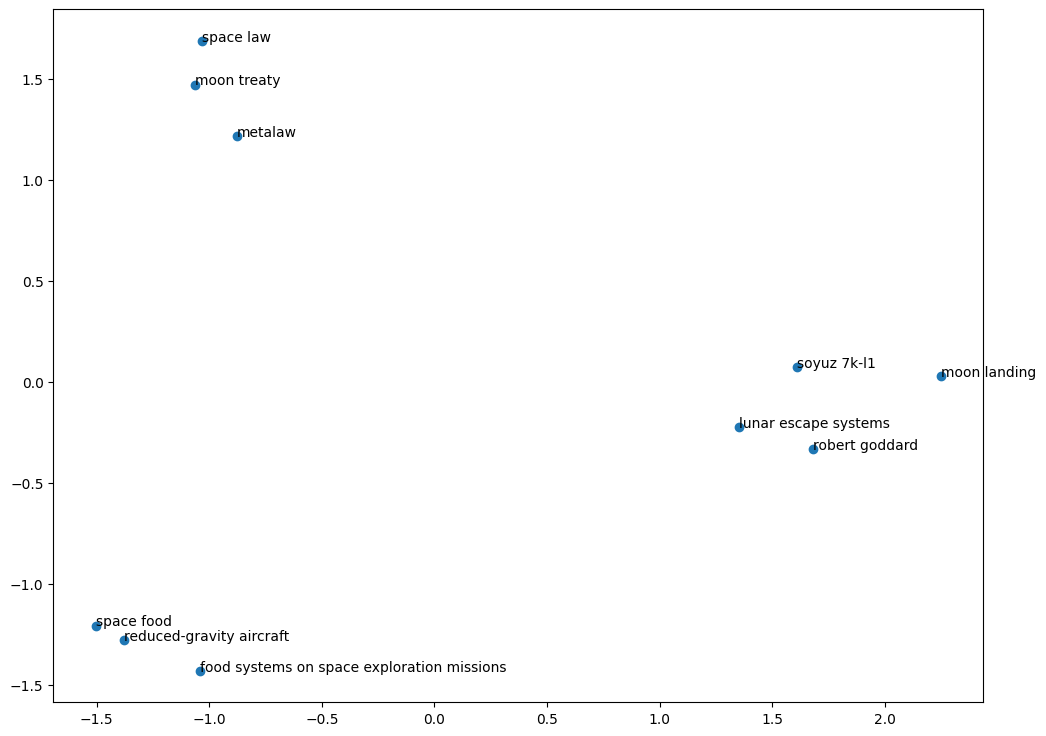

In [36]:
plot_nodes(terms)

What you saw was a step by step way of implementing DeepWalk - we will soon see how we can implement it even easier using special packages.

## Images

### Images for Deep Learning

When we use images for deep learning, there are a few standard pre-processing steps that must be done. When we work with pre-trained models, we must be sure that our pre-processing matches how the images were pre-processed for the original training.

Let us load a few sample datasets from pytorch and see what kind of options we have. For vision related tasks, we use torchvision: https://pytorch.org/docs/stable/torchvision/index.html

In [37]:
import torch
import torchvision
import torch.nn as nn

Each of the image pre-processing tasks are referred to as transformations. Some standard transformations are resizing, rescaling, and normalising the image with respect to the mean and standard deviation asssociated with the model. In PyTorch we use the transformer class to do these tasks, and can stack them up with the compose function.

https://pytorch.org/docs/stable/torchvision/transforms.html

Below is an example of transformations frequently applied to images. Here, this is part of a series of pre-processing steps for getting an image compatible with resnet-18, a popular 2018 Convolutional Neural Network used to train images.

In [38]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [39]:
from PIL import Image


In [41]:
image = Image.open('/content/coffee.jpeg')

In [42]:
transformed_image = transforms(image)

Let us now look at our transformed image as it is ready for deep learning models.

In [43]:
transformed_image

tensor([[[-0.1143, -0.1143, -0.0972,  ...,  0.3823,  0.4337,  0.4679],
         [-0.0972, -0.1314, -0.1486,  ...,  0.3823,  0.4166,  0.3994],
         [-0.1486, -0.1486, -0.1657,  ...,  0.3823,  0.4166,  0.3994],
         ...,
         [-1.8097, -1.8097, -1.7925,  ..., -1.6042, -1.5357, -1.5357],
         [-1.7754, -1.7754, -1.7583,  ..., -1.4843, -1.4500, -1.5528],
         [-1.7925, -1.7925, -1.7754,  ..., -1.4843, -1.5014, -1.5185]],

        [[ 0.5728,  0.6078,  0.5903,  ...,  1.3957,  1.4482,  1.4482],
         [ 0.5553,  0.5728,  0.5553,  ...,  1.3957,  1.4132,  1.3957],
         [ 0.5553,  0.5203,  0.5028,  ...,  1.3957,  1.4307,  1.4132],
         ...,
         [-1.7031, -1.7031, -1.7381,  ..., -1.1253, -1.1253, -1.1078],
         [-1.7206, -1.7031, -1.7381,  ..., -1.1954, -1.1779, -1.1954],
         [-1.7031, -1.7206, -1.7381,  ..., -1.1429, -1.1779, -1.2479]],

        [[ 1.0888,  1.1237,  1.1411,  ...,  1.9428,  1.9951,  2.0125],
         [ 1.0714,  1.0714,  1.0365,  ...,  1

In [44]:
transformed_image.shape

torch.Size([3, 224, 224])

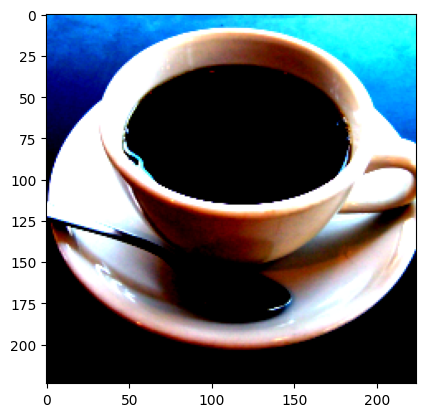

In [45]:
# the permute function to put the channels as the last dimensions
plt.imshow(transformed_image.permute(1, 2, 0))

These transformations are applied to each of image for training and testing. As with text, for deep learning we don't often do much pre-processing beyond resizing/rescaling and normalising the image. The deep learning does the processing itself!

### Vector Representations and Image Embeddings

How do neural networks interpret images after being fed them? How do images pass through a deep neural model. Luckily for us with pre-trained models, we can perform this rapidly. Here, we use the final pre-trained layer, which is the avgpool layer. We use different layers depending on the kind of model.

#### Download!

In [46]:
import torchvision.models as models


In [47]:
# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
d = model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 90.1MB/s]


In [48]:
def get_vector(image):
    # code adapted from the package:
    # https://github.com/christiansafka/img2vec/
    # Create a PyTorch tensor with the transformed image
    t_img = transforms(image)
    # Create a vector of zeros that will hold our feature vector
    # The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)

    # Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())                 # <-- flatten

    # Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # Run the model on our transformed image
    with torch.no_grad():                               # <-- no_grad context
        model(t_img.unsqueeze(0))                       # <-- unsqueeze
    # Detach our copy function from the layer
    h.remove()
    # Return the feature vector
    return my_embedding

In [49]:
get_vector(image)

tensor([5.3997e-01, 1.3035e+00, 1.0498e+00, 6.9986e-02, 3.2752e-01, 1.7390e+00,
        1.2652e+00, 1.5956e+00, 7.6288e-01, 3.2030e-01, 4.4049e+00, 1.9426e+00,
        3.3769e+00, 1.4613e+00, 5.1475e+00, 4.6084e-01, 2.8197e-01, 6.5279e-01,
        1.1290e+00, 6.9738e-01, 4.7483e-01, 3.4697e-01, 8.7866e-02, 2.7254e-01,
        1.3208e+00, 6.0673e-01, 4.5278e+00, 1.3298e+00, 3.8890e+00, 3.4767e-01,
        2.6856e-02, 1.5723e+00, 4.9660e-01, 2.6452e-01, 6.7848e-01, 4.5417e-01,
        2.6500e-02, 8.7713e-01, 9.2488e-01, 1.4980e+00, 3.5719e-02, 1.9135e-01,
        3.0919e-02, 4.9682e-02, 7.7168e-01, 2.2759e+00, 6.7800e-01, 1.0432e+00,
        5.5847e-01, 3.7508e-01, 0.0000e+00, 3.7503e-01, 7.1091e-02, 2.8841e-02,
        7.1579e-01, 1.3569e+00, 2.7363e+00, 5.5587e-01, 9.0002e-01, 5.6971e-02,
        6.7179e-01, 5.1170e-02, 4.9448e-01, 1.9621e+00, 4.0071e-02, 1.6012e+00,
        1.6918e-01, 1.2353e+00, 2.2566e-01, 2.1897e-01, 2.8282e+00, 1.1699e-01,
        3.4161e+00, 1.6624e+00, 1.8612e+

Cool! So we just passed our transformed coffee image to the pre-trained resnet model and got a 512 dimensional image vector as result. resnet uses this vector to classify it. We can expect this image embedding to contain information of what are the coffee-like characteristics in the image.

The same code is wrapped up in the package img2vec_pytorch, and so far features a quick vector creation pipeline for resnet and AlexNet.

In [50]:
!pip install img2vec_pytorch

In [51]:
from img2vec_pytorch import Img2Vec


In [52]:
img2vec = Img2Vec()

In [53]:
coffee_vec = img2vec.get_vec(image)

In [54]:
coffee_vec

array([5.08294702e-01, 1.64867795e+00, 1.33357286e+00, 5.90274453e-01,
       3.16582084e-01, 1.56642401e+00, 2.06730318e+00, 1.35360920e+00,
       8.31650555e-01, 1.37682453e-01, 4.21275282e+00, 1.89873266e+00,
       3.05411696e+00, 4.69658524e-01, 4.63427258e+00, 2.74933368e-01,
       2.20821515e-01, 2.92175740e-01, 1.02474439e+00, 6.59252346e-01,
       5.78673601e-01, 1.20089583e-01, 2.16739208e-01, 3.27716619e-01,
       1.31112063e+00, 2.59390861e-01, 3.90389824e+00, 4.44067597e-01,
       3.31800938e+00, 2.55674213e-01, 1.01015970e-01, 1.90725160e+00,
       7.32540667e-01, 7.51135349e-01, 7.65364587e-01, 8.23808610e-01,
       5.00743687e-02, 6.58984959e-01, 6.20174408e-01, 1.55640972e+00,
       4.28980410e-01, 3.10704112e-01, 2.40873665e-01, 0.00000000e+00,
       1.10626161e+00, 3.08764863e+00, 2.13556483e-01, 1.40554845e+00,
       3.45450252e-01, 8.70984852e-01, 8.28928663e-04, 9.18342650e-01,
       1.64876238e-01, 1.38215914e-01, 7.51347184e-01, 1.23836720e+00,
      

I uploaded my own pictures of a cat and dog, here. Feel free to do the same!

In [55]:
cat_image = Image.open('/content/cat.jpg')


In [56]:
dog_image = Image.open('/content/dog.png')


These vectors are useful because we can then perform basic similarity checks using them.

In [57]:
cat_vec = img2vec.get_vec(cat_image.convert('RGB'), tensor=True)

In [58]:
dog_vec = img2vec.get_vec(dog_image.convert('RGB'), tensor=True)

In [59]:
coffee_vec = img2vec.get_vec(image, tensor=True)

In [60]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [61]:
cos_sim = cos(cat_vec,
              dog_vec)

In [62]:
cos_sim

tensor([[[0.6274]]])

In [63]:
cos_sim = cos(coffee_vec,
              cat_vec)

In [64]:
cos_sim

tensor([[[0.4578]]])

The cat looks more like the dog than the coffee cup. Whew!

## Audio

### Extracting Representations of Audio - Download Model!

### Audio Embeddings and Measurements

In [1]:
!pip install datasets

In [2]:
import soundfile as sf
import torch

In [3]:
from transformers import Wav2Vec2Tokenizer, Wav2Vec2Model, Wav2Vec2Processor

In [4]:
# load pretrained model
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:720: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in ve

In [5]:
from datasets import load_dataset

In [6]:
def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

In [7]:
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
ds = ds.map(map_to_array)

The repository for patrickvonplaten/librispeech_asr_dummy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/patrickvonplaten/librispeech_asr_dummy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating validation split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/73 [00:00<?, ? examples/s]

In [8]:
audio_input_0 = ds["speech"][0]

In [9]:
input_values = processor(audio_input_0, return_tensors="pt").input_values  # Batch size 1

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [10]:
input_values

tensor([[-0.0014, -0.0037, -0.0019,  ..., -0.0467, -0.0585, -0.0571]])

In [11]:
len(input_values.shape)

2

In [12]:
hidden_states_asr = model(input_values).last_hidden_state

In [13]:
hidden_states_asr.shape

torch.Size([1, 544, 768])

In [14]:
# load audio
audio_input_1 = ds["speech"][1]

In [15]:
input_values = processor(audio_input_1, return_tensors="pt").input_values  # Batch size 1

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [16]:
len(input_values[0])

178080

In [17]:
hidden_states_asr_1 = model(input_values).last_hidden_state

In [18]:
hidden_states_asr_1.shape

torch.Size([1, 556, 768])

What have we done here so far? We picked up two different wav files, both from the pre-trained corpus on speech recognition from librispeech.

We then processed them using the transformers wav2vec2 tokenizer, and then passed them through the model, which returned us the hidden states - we can see here that the hidden states are different shapes, with the size of the audio file influencing the shape of the hidden states. This means that the output size depends on the input, and we must do something to keep them all the same size (or use similar length files).

One quick way to get them ready to use for analysis is to create an "average" vector.

In [19]:
avg_hidden_states_asr = torch.mean(hidden_states_asr[0], dim=0).detach().numpy()

In [20]:
avg_hidden_states_asr.shape

(768,)

In [21]:
avg_hidden_states_asr_1 = torch.mean(hidden_states_asr_1[0], dim=0).detach().numpy()

In [22]:
avg_hidden_states_asr_1

array([-5.29983118e-02, -3.02449372e-02, -2.86206007e-02, -9.28940326e-02,
        8.66348967e-02, -6.20793402e-02,  4.59564924e-02, -9.78079252e-03,
        1.86965421e-01, -1.22718357e-01, -1.51961949e-02,  7.30769858e-02,
        1.88676398e-02,  5.32730063e-03,  6.85694218e-02,  4.26640287e-02,
       -5.88035405e-01,  2.09897235e-01,  3.82276103e-02,  1.01651497e-01,
       -1.99906409e-01,  8.41076544e-04,  4.58541244e-01,  9.37685370e-03,
        1.28433391e-01, -8.64822045e-03, -6.42193019e-01,  2.15667635e-02,
       -3.07618212e-02, -1.69311136e-01,  2.04223096e-01, -7.25698052e-03,
        4.35280707e-03, -6.34918213e-02, -1.52328521e-01,  7.82898739e-02,
       -6.09947741e-02, -5.56766288e-03, -1.09087609e-01,  2.07817152e-01,
       -8.56875777e-02, -1.66678533e-01, -1.77373871e-01,  2.67927438e-01,
       -3.39191437e-01, -1.10572517e-01, -1.19605949e-02, -8.43212940e-03,
        3.88409197e-02,  3.30422185e-02, -1.07199047e-02,  2.06614081e-02,
       -1.09534927e-01,  

Cool! Now that we have both down to an average vector, let's calculate the difference.

In [23]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
  res = dot(a, b)/(norm(a)*norm(b))
  return res

In [24]:
cos_sim(avg_hidden_states_asr_1, avg_hidden_states_asr)

0.97030234

So these embeddings are fairly different - but to be able to really tell how useful these embeddings are, we must compare with a third source. Let's whip up a quick function to get average embeddings.

In [25]:
def average_audio_embedding(audio_path):
  audio_input, _ = sf.read(audio_path)
  input_values = processor(audio_input, return_tensors="pt").input_values  # Batch size 1
  input_values = torch.transpose(input_values, 0, 1)
  # print(input_values)
  # print(input_values.shape)
  hidden_states = model(input_values).last_hidden_state
  avg_hidden_state = torch.mean(hidden_states[0], dim=0).detach().numpy()
  return avg_hidden_state

I downloaded the 30 free country music samples from [stayonbeat.com](https://www.stayonbeat.com/2014/01/13/free-country-music-loops/), and uploaded a couple on to Colab to see what the embeddings look like. You are encouraged to do the same or use your own music.

In [31]:
sample_path_1 = "/content/StayOnBeat.com_CountryLoops_1.wav"

In [32]:
sample_1_embedding = average_audio_embedding(sample_path_1)

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [33]:
sample_path_2 = "/content/StayOnBeat.com_CountryLoops_2.wav"

In [34]:
sample_2_embedding = average_audio_embedding(sample_path_2)

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [35]:
audio_vectors = {"asr_1":avg_hidden_states_asr_1, "asr":avg_hidden_states_asr, "country_sample_1":sample_1_embedding, "country_sample_2":sample_2_embedding}

In [36]:
cos_sim(avg_hidden_states_asr_1, avg_hidden_states_asr)

0.97030234

In [37]:
cos_sim(sample_1_embedding, avg_hidden_states_asr)

0.4213996

In [38]:
cos_sim(sample_1_embedding, sample_2_embedding)

0.9916408

Observing the similarities, we see how the cosine similarities for the country music embeddings are far more similar than the speech vectors.

Something to note here is that wav2vec2 is focused on speech recognition, so it won't do the greatest job at embedding and understanding songs. However, there are other options to embed such files - it's up to you to find the best model for your task at hand!



##	Deep Reinforcement Learning Montage



##	Integrative Learning - Multi-modal, Complex and Complete Models


# Explainability and AI

FOLLOW SLIDES

# PRACTICE: Explaining based on Perturbation and Surrogate Based Models

## Perturbation based explainability

In [40]:
!pip install lime scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=52cc122f7717ac039b394fe9e5777241cfebd0b20e0ff2ad0940912db5b6930f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [42]:


# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')


553467096/553467096 [==============================] - 10s 0us/step


In [44]:
# Load and preprocess image
img_path = '/content/cat.jpg'  # Upload an image to Colab
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [45]:
# Get original prediction
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=1)[0]
print(f"Original prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]:.2f})")

35363/35363 [==============================] - 0s 0us/step
Original prediction: tabby (0.37)


In [46]:
# Perturbation-based explanation
def perturb_image(img, patch_size=8):
    perturbed = img.copy()
    h, w, _ = img.shape
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            perturbed[i:i+patch_size, j:j+patch_size, :] = 0
    return perturbed

In [47]:
# Generate saliency map - note - this will take some time!
saliency_map = np.zeros((224, 224))
patch_size = 8

for i in range(0, 224, patch_size):
    for j in range(0, 224, patch_size):
        perturbed = perturb_image(x[0], patch_size)
        perturbed[i:i+patch_size, j:j+patch_size, :] = x[0, i:i+patch_size, j:j+patch_size, :]
        pred = model.predict(np.expand_dims(perturbed, axis=0))
        saliency_map[i:i+patch_size, j:j+patch_size] = pred[0, np.argmax(preds)]

1/1 [==============================] - 1s 594ms/step


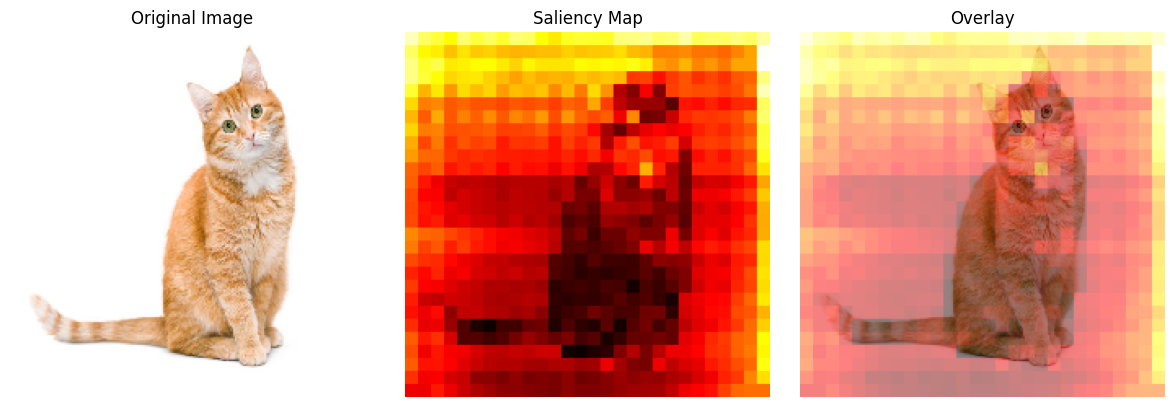

In [48]:
# Visualize results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(saliency_map, cmap='hot')
plt.title('Saliency Map')
plt.axis('off')

plt.subplot(133)
plt.imshow(img)
plt.imshow(saliency_map, cmap='hot', alpha=0.5)
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()



## LIME

In [49]:
# LIME Explanation
explainer = lime_image.LimeImageExplainer()

In [50]:
def predict_fn(images):
    images = preprocess_input(images)
    return model.predict(images)


In [51]:
explanation = explainer.explain_instance(image.img_to_array(img), predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Get the explanation for the top class
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


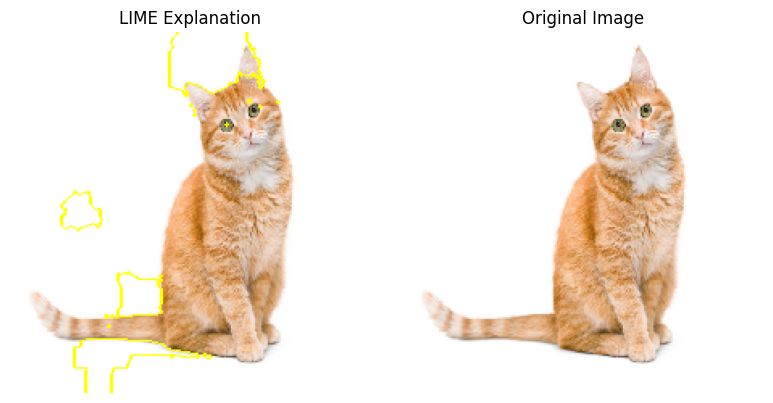

In [52]:
# Visualize LIME results
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(mark_boundaries(image.img_to_array(img) / 255.0, mask))
plt.title('LIME Explanation')
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#	PRACTICE: Putting the Models together

Let's recap what we've coded up so far in this tutorial. We started with a basic single layer and double layer Keras and PyTorch Neural Network, trained to perform classification on handwritten digits. This model performed quite poorly, but we quickly saw that when we used a more complex convolutional network, we saw high levels of performance!

We then moved on to language models, which are now quite the fad (ChatGPT!), with a variety of models and pipelines, and some state of the art models. Such models can often be quite helpful with a variety of social scientific tasks, given how often social scientific data can be text (https://press.princeton.edu/books/hardcover/9780691207544/text-as-data).

But social scientific data can take many forms, and the next section saw simple out of the box methods to embed graphs and networks, images, and audio, with a small glimpse of how even similarity networks can be the foundation for more complex analysis.

In this section, we will see how all of this can come together, using a multi-modal text and image model, that allows us to search for images with natural language!


## Vision Language Models

There exist many powerful multi-modal models built off of dual embeddings such as CLIP and other Vision Transformer models. This blog post will give you a round up of how the model is trained (beyond the slides!).

https://huggingface.co/blog/vlms

We'll be running one of the latest of these models, and directly query the model with both an image and a text query. A note that this will likely take some time and memory to run (if it does at all!).

In [1]:
pip install accelerate

In [2]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
import accelerate

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

LlavaNextForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

In [4]:
from PIL import Image
import requests

In [ ]:
url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to(device)
output = model.generate(**inputs, max_new_tokens=100)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [ ]:
print(processor.decode(output[0], skip_special_tokens=True))

A note that this is going to likely take some time - it's a big model to download and also uses a bunch of RAM.

## (OPTIONAL) Building a CLIP-based model from scratch.

### Natural language image search with a Dual Encoder

We will be following the [neural language search tutorial](https://keras.io/examples/nlp/nl_image_search/
) from the Keras documentation, written by  [Khalid Salama](https://www.linkedin.com/in/khalid-salama-24403144/).

### Introduction

The example demonstrates how to build a dual encoder (also known as two-tower) neural network
model to search for images using natural language. The model is inspired by
the [CLIP](https://openai.com/blog/clip/)
approach, introduced by Alec Radford et al. The idea is to train a vision encoder and a text
encoder jointly to project the representation of images and their captions into the same embedding
space, such that the caption embeddings are located near the embeddings of the images they describe.

This example requires TensorFlow 2.4 or higher.
In addition, [TensorFlow Hub](https://www.tensorflow.org/hub)
and [TensorFlow Text](https://www.tensorflow.org/tutorials/tensorflow_text/intro)
are required for the BERT model, and [TensorFlow Addons](https://www.tensorflow.org/addons)
is required for the AdamW optimizer. These libraries can be installed using the
following command:

```python
pip install -q -U tensorflow-hub tensorflow-text tensorflow-addons
```

In [ ]:
! pip install -q -U tensorflow-hub tensorflow-text tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 28.3 MB/s eta 0:00:00


### Setup

In [ ]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

# Suppressing tf.hub warnings
tf.get_logger().setLevel("ERROR")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Prepare the data

We will use the [MS-COCO](https://cocodataset.org/#home) dataset to train our
dual encoder model. MS-COCO contains over 82,000 images, each of which has at least
5 different caption annotations. The dataset is usually used for
[image captioning](https://www.tensorflow.org/tutorials/text/image_captioning)
tasks, but we can repurpose the image-caption pairs to train our dual encoder
model for image search.

###
Download and extract the data

First, let's download the dataset, which consists of two compressed folders:
one with images, and the other—with associated image captions.
Note that the compressed images folder is 13GB in size.

In [ ]:
root_dir = "datasets"
annotations_dir = os.path.join(root_dir, "annotations")
images_dir = os.path.join(root_dir, "train2014")
tfrecords_dir = os.path.join(root_dir, "tfrecords")
annotation_file = os.path.join(annotations_dir, "captions_train2014.json")

# Download caption annotation files
if not os.path.exists(annotations_dir):
    annotation_zip = tf.keras.utils.get_file(
        "captions.zip",
        cache_dir=os.path.abspath("."),
        origin="http://images.cocodataset.org/annotations/annotations_trainval2014.zip",
        extract=True,
    )
    os.remove(annotation_zip)

# Download image files
if not os.path.exists(images_dir):
    image_zip = tf.keras.utils.get_file(
        "train2014.zip",
        cache_dir=os.path.abspath("."),
        origin="http://images.cocodataset.org/zips/train2014.zip",
        extract=True,
    )
    os.remove(image_zip)

print("Dataset is downloaded and extracted successfully.")

with open(annotation_file, "r") as f:
    annotations = json.load(f)["annotations"]

image_path_to_caption = collections.defaultdict(list)
for element in annotations:
    caption = f"{element['caption'].lower().rstrip('.')}"
    image_path = images_dir + "/COCO_train2014_" + "%012d.jpg" % (element["image_id"])
    image_path_to_caption[image_path].append(caption)

image_paths = list(image_path_to_caption.keys())
print(f"Number of images: {len(image_paths)}")

13510573713/13510573713 [==============================] - 321s 0us/step
Dataset is downloaded and extracted successfully.
Number of images: 82783


#### Process and save the data to TFRecord files

You can change the `sample_size` parameter to control many image-caption pairs
will be used for training the dual encoder model.
In this example we set `train_size` to 30,000 images,
which is about 35% of the dataset. We use 2 captions for each
image, thus producing 60,000 image-caption pairs. The size of the training set
affects the quality of the produced encoders, but more examples would lead to
longer training time.

In [ ]:
train_size = 30000
valid_size = 5000
captions_per_image = 2
images_per_file = 2000

train_image_paths = image_paths[:train_size]
num_train_files = int(np.ceil(train_size / images_per_file))
train_files_prefix = os.path.join(tfrecords_dir, "train")

valid_image_paths = image_paths[-valid_size:]
num_valid_files = int(np.ceil(valid_size / images_per_file))
valid_files_prefix = os.path.join(tfrecords_dir, "valid")

tf.io.gfile.makedirs(tfrecords_dir)


def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def create_example(image_path, caption):
    feature = {
        "caption": bytes_feature(caption.encode()),
        "raw_image": bytes_feature(tf.io.read_file(image_path).numpy()),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def write_tfrecords(file_name, image_paths):
    caption_list = []
    image_path_list = []
    for image_path in image_paths:
        captions = image_path_to_caption[image_path][:captions_per_image]
        caption_list.extend(captions)
        image_path_list.extend([image_path] * len(captions))

    with tf.io.TFRecordWriter(file_name) as writer:
        for example_idx in range(len(image_path_list)):
            example = create_example(
                image_path_list[example_idx], caption_list[example_idx]
            )
            writer.write(example.SerializeToString())
    return example_idx + 1


def write_data(image_paths, num_files, files_prefix):
    example_counter = 0
    for file_idx in tqdm(range(num_files)):
        file_name = files_prefix + "-%02d.tfrecord" % (file_idx)
        start_idx = images_per_file * file_idx
        end_idx = start_idx + images_per_file
        example_counter += write_tfrecords(file_name, image_paths[start_idx:end_idx])
    return example_counter


train_example_count = write_data(train_image_paths, num_train_files, train_files_prefix)
print(f"{train_example_count} training examples were written to tfrecord files.")

valid_example_count = write_data(valid_image_paths, num_valid_files, valid_files_prefix)
print(f"{valid_example_count} evaluation examples were written to tfrecord files.")

100%|██████████| 15/15 [04:34<00:00, 18.33s/it]


60000 training examples were written to tfrecord files.


100%|██████████| 3/3 [00:45<00:00, 15.07s/it]

10000 evaluation examples were written to tfrecord files.


#### Create `tf.data.Dataset` for training and evaluation

In [ ]:

feature_description = {
    "caption": tf.io.FixedLenFeature([], tf.string),
    "raw_image": tf.io.FixedLenFeature([], tf.string),
}


def read_example(example):
    features = tf.io.parse_single_example(example, feature_description)
    raw_image = features.pop("raw_image")
    features["image"] = tf.image.resize(
        tf.image.decode_jpeg(raw_image, channels=3), size=(299, 299)
    )
    return features


def get_dataset(file_pattern, batch_size):

    return (
        tf.data.TFRecordDataset(tf.data.Dataset.list_files(file_pattern))
        .map(
            read_example,
            num_parallel_calls=tf.data.experimental.AUTOTUNE,
            deterministic=False,
        )
        .shuffle(batch_size * 10)
        .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        .batch(batch_size)
    )


### Implement the projection head

The projection head is used to transform the image and the text embeddings to
the same embedding space with the same dimensionality.

In [ ]:

def project_embeddings(
    embeddings, num_projection_layers, projection_dims, dropout_rate
):
    projected_embeddings = layers.Dense(units=projection_dims)(embeddings)
    for _ in range(num_projection_layers):
        x = tf.nn.gelu(projected_embeddings)
        x = layers.Dense(projection_dims)(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Add()([projected_embeddings, x])
        projected_embeddings = layers.LayerNormalization()(x)
    return projected_embeddings


### Implement the vision encoder

In this example, we use [Xception](https://keras.io/api/applications/xception/)
from [Keras Applications](https://keras.io/api/applications/) as the base for the
vision encoder.

In [ ]:

def create_vision_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the pre-trained Xception model to be used as the base encoder.
    xception = keras.applications.Xception(
        include_top=False, weights="imagenet", pooling="avg"
    )
    # Set the trainability of the base encoder.
    for layer in xception.layers:
        layer.trainable = trainable
    # Receive the images as inputs.
    inputs = layers.Input(shape=(299, 299, 3), name="image_input")
    # Preprocess the input image.
    xception_input = tf.keras.applications.xception.preprocess_input(inputs)
    # Generate the embeddings for the images using the xception model.
    embeddings = xception(xception_input)
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the vision encoder model.
    return keras.Model(inputs, outputs, name="vision_encoder")


### Implement the text encoder

We use [BERT](https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1)
from [TensorFlow Hub](https://tfhub.dev) as the text encoder

In [ ]:

def create_text_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the BERT preprocessing module.
    preprocess = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2",
        name="text_preprocessing",
    )
    # Load the pre-trained BERT model to be used as the base encoder.
    bert = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1",
        "bert",
    )
    # Set the trainability of the base encoder.
    bert.trainable = trainable
    # Receive the text as inputs.
    inputs = layers.Input(shape=(), dtype=tf.string, name="text_input")
    # Preprocess the text.
    bert_inputs = preprocess(inputs)
    # Generate embeddings for the preprocessed text using the BERT model.
    embeddings = bert(bert_inputs)["pooled_output"]
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the text encoder model.
    return keras.Model(inputs, outputs, name="text_encoder")


### Implement the dual encoder

To calculate the loss, we compute the pairwise dot-product similarity between
each `caption_i` and `images_j` in the batch as the predictions.
The target similarity between `caption_i`  and `image_j` is computed as
the average of the (dot-product similarity between `caption_i` and `caption_j`)
and (the dot-product similarity between `image_i` and `image_j`).
Then, we use crossentropy to compute the loss between the targets and the predictions.

In [ ]:

class DualEncoder(keras.Model):
    def __init__(self, text_encoder, image_encoder, temperature=1.0, **kwargs):
        super(DualEncoder, self).__init__(**kwargs)
        self.text_encoder = text_encoder
        self.image_encoder = image_encoder
        self.temperature = temperature
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def call(self, features, training=False):
        # Place each encoder on a separate GPU (if available).
        # TF will fallback on available devices if there are fewer than 2 GPUs.
        with tf.device("/gpu:0"):
            # Get the embeddings for the captions.
            caption_embeddings = text_encoder(features["caption"], training=training)
        with tf.device("/gpu:1"):
            # Get the embeddings for the images.
            image_embeddings = vision_encoder(features["image"], training=training)
        return caption_embeddings, image_embeddings

    def compute_loss(self, caption_embeddings, image_embeddings):
        # logits[i][j] is the dot_similarity(caption_i, image_j).
        logits = (
            tf.matmul(caption_embeddings, image_embeddings, transpose_b=True)
            / self.temperature
        )
        # images_similarity[i][j] is the dot_similarity(image_i, image_j).
        images_similarity = tf.matmul(
            image_embeddings, image_embeddings, transpose_b=True
        )
        # captions_similarity[i][j] is the dot_similarity(caption_i, caption_j).
        captions_similarity = tf.matmul(
            caption_embeddings, caption_embeddings, transpose_b=True
        )
        # targets[i][j] = avarage dot_similarity(caption_i, caption_j) and dot_similarity(image_i, image_j).
        targets = keras.activations.softmax(
            (captions_similarity + images_similarity) / (2 * self.temperature)
        )
        # Compute the loss for the captions using crossentropy
        captions_loss = keras.losses.categorical_crossentropy(
            y_true=targets, y_pred=logits, from_logits=True
        )
        # Compute the loss for the images using crossentropy
        images_loss = keras.losses.categorical_crossentropy(
            y_true=tf.transpose(targets), y_pred=tf.transpose(logits), from_logits=True
        )
        # Return the mean of the loss over the batch.
        return (captions_loss + images_loss) / 2

    def train_step(self, features):
        with tf.GradientTape() as tape:
            # Forward pass
            caption_embeddings, image_embeddings = self(features, training=True)
            loss = self.compute_loss(caption_embeddings, image_embeddings)
        # Backward pass
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        # Monitor loss
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, features):
        caption_embeddings, image_embeddings = self(features, training=False)
        loss = self.compute_loss(caption_embeddings, image_embeddings)
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}


### Train the dual encoder model

In this experiment, we freeze the base encoders for text and images, and make only
the projection head trainable.

In [ ]:
num_epochs = 5  # In practice, train for at least 30 epochs
batch_size = 256

vision_encoder = create_vision_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
text_encoder = create_text_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
dual_encoder = DualEncoder(text_encoder, vision_encoder, temperature=0.05)
dual_encoder.compile(
    optimizer=tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
)

Note that training the model with 60,000 image-caption pairs, with a batch size of 256,
takes around 12 minutes per epoch using a V100 GPU accelerator. If 2 GPUs are available,
the epoch takes around 8 minutes.

In [ ]:
print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")
print(f"Number of examples (caption-image pairs): {train_example_count}")
print(f"Batch size: {batch_size}")
print(f"Steps per epoch: {int(np.ceil(train_example_count / batch_size))}")
train_dataset = get_dataset(os.path.join(tfrecords_dir, "train-*.tfrecord"), batch_size)
valid_dataset = get_dataset(os.path.join(tfrecords_dir, "valid-*.tfrecord"), batch_size)
# Create a learning rate scheduler callback.
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3
)
# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
history = dual_encoder.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=[reduce_lr, early_stopping],
)
print("Training completed. Saving vision and text encoders...")
vision_encoder.save("vision_encoder")
text_encoder.save("text_encoder")
print("Models are saved.")

Plotting the training loss:

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()

### Search for images using natural language queries

We can then retrieve images corresponding to natural language queries via
the following steps:

1. Generate embeddings for the images by feeding them into the `vision_encoder`.
2. Feed the natural language query to the `text_encoder` to generate a query embedding.
3. Compute the similarity between the query embedding and the image embeddings
in the index to retrieve the indices of the top matches.
4. Look up the paths of the top matching images to display them.

Note that, after training the `dual encoder`, only the fine-tuned `vision_encoder`
and `text_encoder` models will be used, while the `dual_encoder` model will be discarded.

#### Generate embeddings for the images

We load the images and feed them into the `vision_encoder` to generate their embeddings.
In large scale systems, this step is performed using a parallel data processing framework,
such as [Apache Spark](https://spark.apache.org) or [Apache Beam](https://beam.apache.org).
Generating the image embeddings may take several minutes.

In [ ]:
print("Loading vision and text encoders...")
vision_encoder = keras.models.load_model("vision_encoder")
text_encoder = keras.models.load_model("text_encoder")
print("Models are loaded.")


def read_image(image_path):
    image_array = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    return tf.image.resize(image_array, (299, 299))


print(f"Generating embeddings for {len(image_paths)} images...")
image_embeddings = vision_encoder.predict(
    tf.data.Dataset.from_tensor_slices(image_paths).map(read_image).batch(batch_size),
    verbose=1,
)
print(f"Image embeddings shape: {image_embeddings.shape}.")

#### Retrieve relevant images

In this example, we use exact matching by computing the dot product similarity
between the input query embedding and the image embeddings, and retrieve the top k
matches. However, *approximate* similarity matching, using frameworks like
[ScaNN](https://github.com/google-research/google-research/tree/master/scann),
[Annoy](https://github.com/spotify/annoy), or [Faiss](https://github.com/facebookresearch/faiss)
is preferred in real-time use cases to scale with a large number of images.

In [ ]:

def find_matches(image_embeddings, queries, k=9, normalize=True):
    # Get the embedding for the query.
    query_embedding = text_encoder(tf.convert_to_tensor(queries))
    # Normalize the query and the image embeddings.
    if normalize:
        image_embeddings = tf.math.l2_normalize(image_embeddings, axis=1)
        query_embedding = tf.math.l2_normalize(query_embedding, axis=1)
    # Compute the dot product between the query and the image embeddings.
    dot_similarity = tf.matmul(query_embedding, image_embeddings, transpose_b=True)
    # Retrieve top k indices.
    results = tf.math.top_k(dot_similarity, k).indices.numpy()
    # Return matching image paths.
    return [[image_paths[idx] for idx in indices] for indices in results]


Set the `query` variable to the type of images you want to search for.
Try things like: 'a plate of healthy food',
'a woman wearing a hat is walking down a sidewalk',
'a bird sits near to the water', or 'wild animals are standing in a field'.

In [ ]:
query = "a family standing next to the ocean on a sandy beach with a surf board"
matches = find_matches(image_embeddings, [query], normalize=True)[0]

plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(matches[i]))
    plt.axis("off")


### Evaluate the retrieval quality

To evaluate the dual encoder model, we use the captions as queries.
We use the out-of-training-sample images and captions to evaluate the retrieval quality,
using top k accuracy. A true prediction is counted if, for a given caption, its associated image
is retrieved within the top k matches.

In [ ]:

def compute_top_k_accuracy(image_paths, k=100):
    hits = 0
    num_batches = int(np.ceil(len(image_paths) / batch_size))
    for idx in tqdm(range(num_batches)):
        start_idx = idx * batch_size
        end_idx = start_idx + batch_size
        current_image_paths = image_paths[start_idx:end_idx]
        queries = [
            image_path_to_caption[image_path][0] for image_path in current_image_paths
        ]
        result = find_matches(image_embeddings, queries, k)
        hits += sum(
            [
                image_path in matches
                for (image_path, matches) in list(zip(current_image_paths, result))
            ]
        )

    return hits / len(image_paths)


print("Scoring training data...")
train_accuracy = compute_top_k_accuracy(train_image_paths)
print(f"Train accuracy: {round(train_accuracy * 100, 3)}%")

print("Scoring evaluation data...")
eval_accuracy = compute_top_k_accuracy(image_paths[train_size:])
print(f"Eval accuracy: {round(eval_accuracy * 100, 3)}%")


### Final remarks

You can obtain better results by increasing the size of the training sample,
train for more  epochs, explore other base encoders for images and text,
set the base encoders to be trainable, and tune the hyperparameters,
especially the `temperature` for the softmax in the loss computation.

# 	You in the Loop

Follow along on the slides!